In [224]:
%load_ext autoreload
# %reload_ext autoreload
%autoreload 1

%aimport b6_epilepsies 
import b6_epilepsies as b6 #.py file in the same dir as this .ipynb
import seaborn as sns
import pandas as pd
from scipy.stats import mannwhitneyu

# Define the custom color palette and genotype order
new_colors_order = sns.color_palette(palette='Set2', n_colors=3)
new_colors_order[0], new_colors_order[1], new_colors_order[2] = new_colors_order[1], new_colors_order[0], new_colors_order[2]
color_map = dict(zip(['wt', 'het', 'hom'], new_colors_order))



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Finished prepping data.
Drawing quick plots...
Wells to omit for box 14: ['F4']


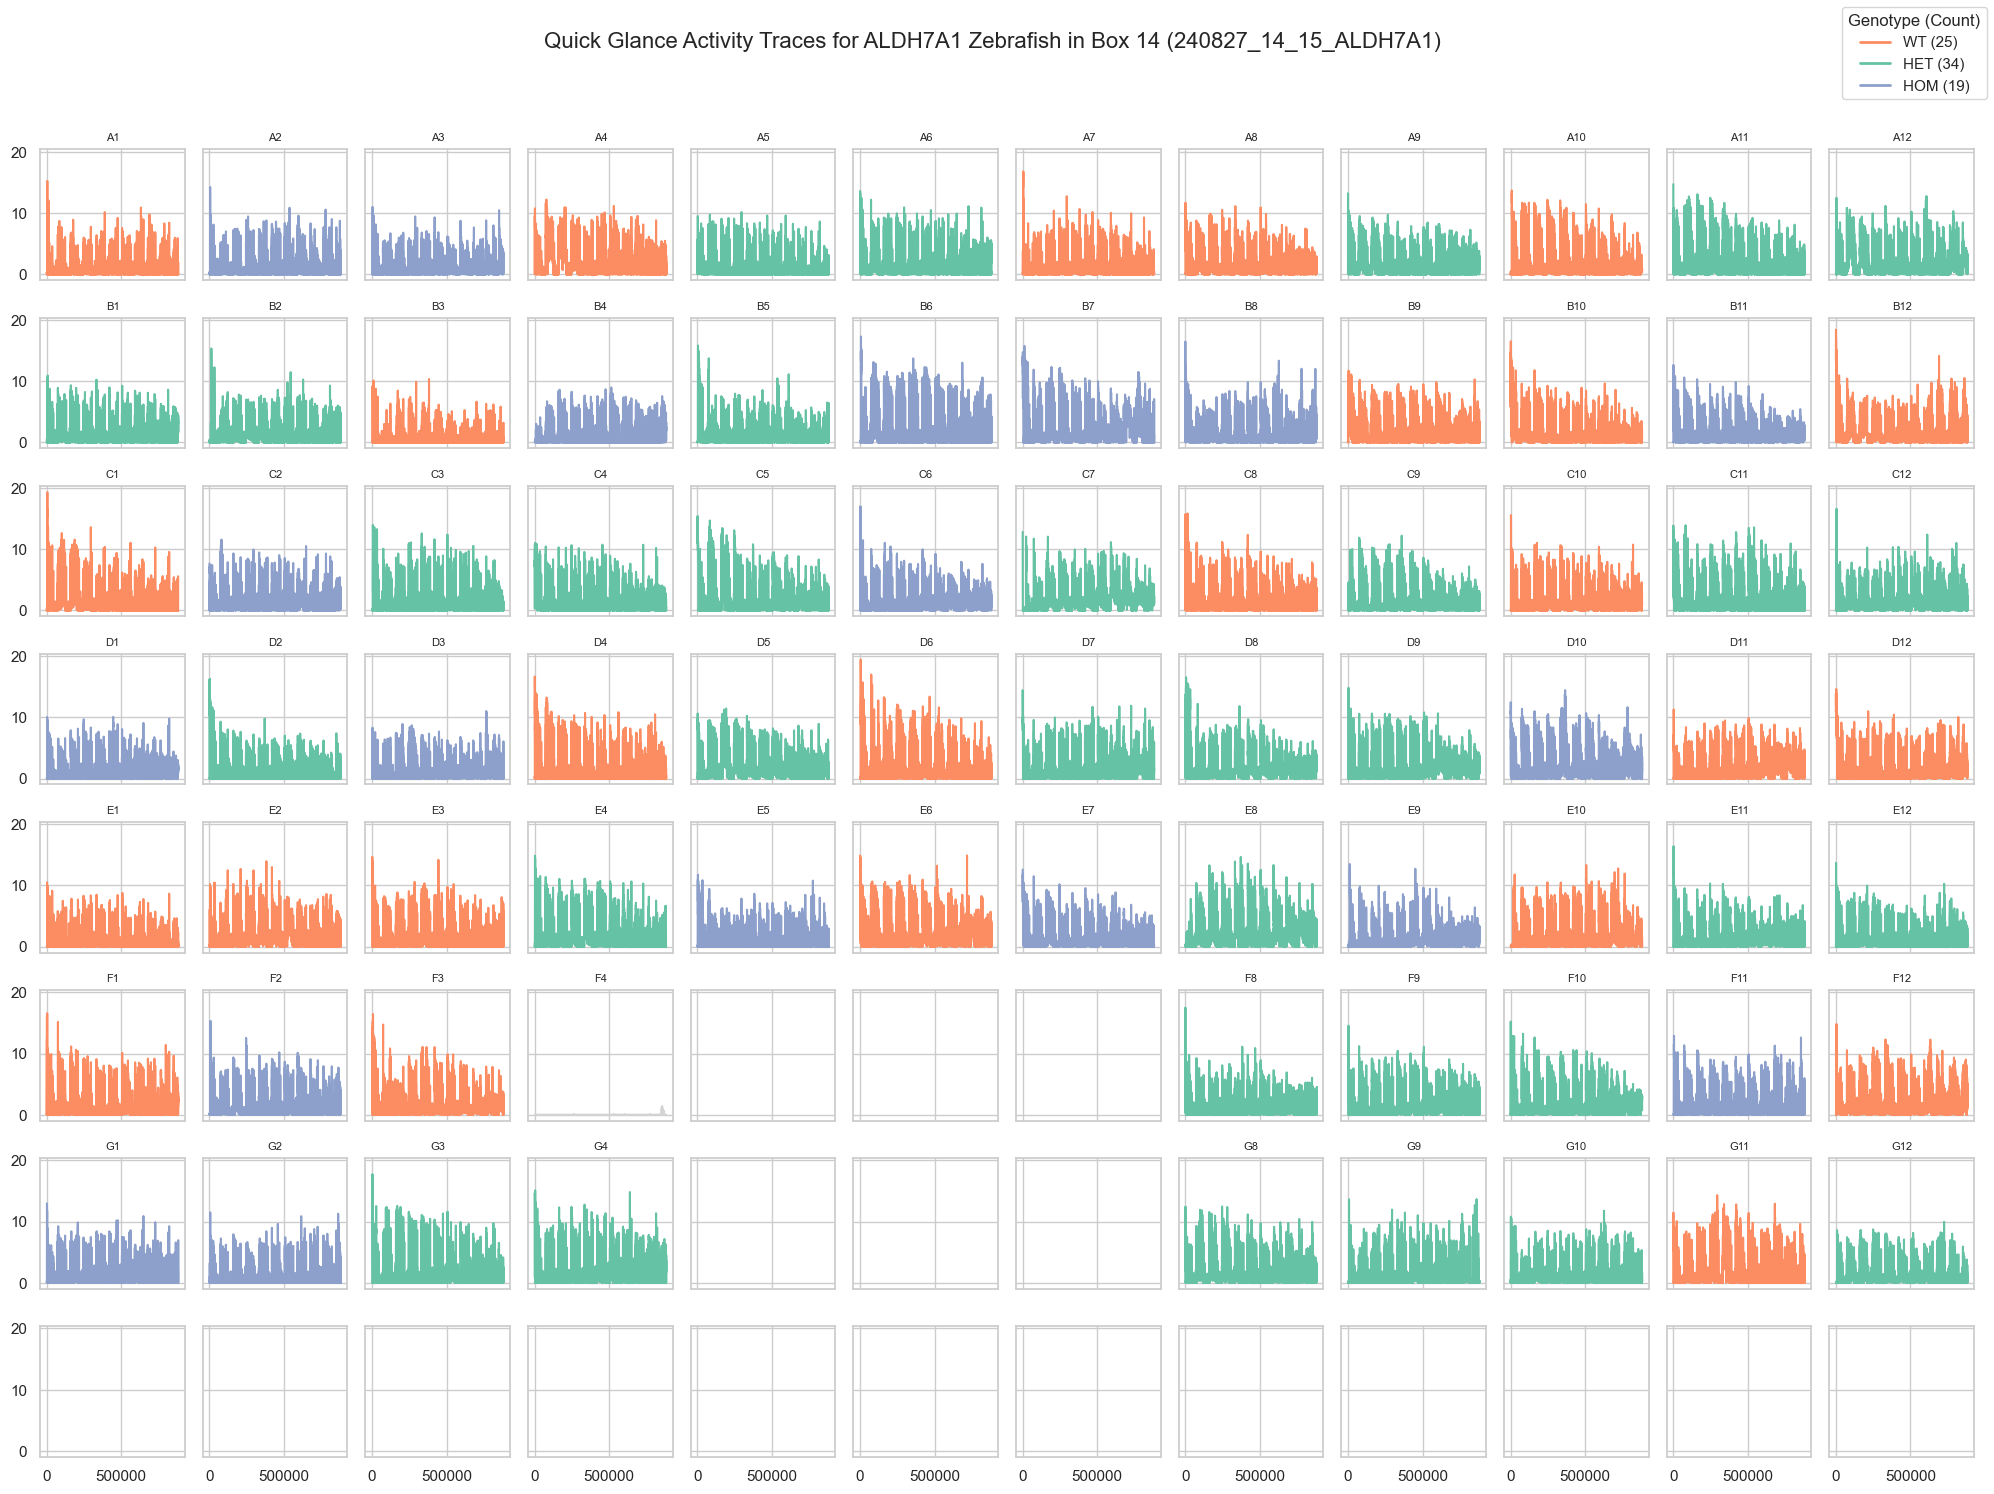

Wells to omit for box 15: ['C5', 'D4', 'E6']


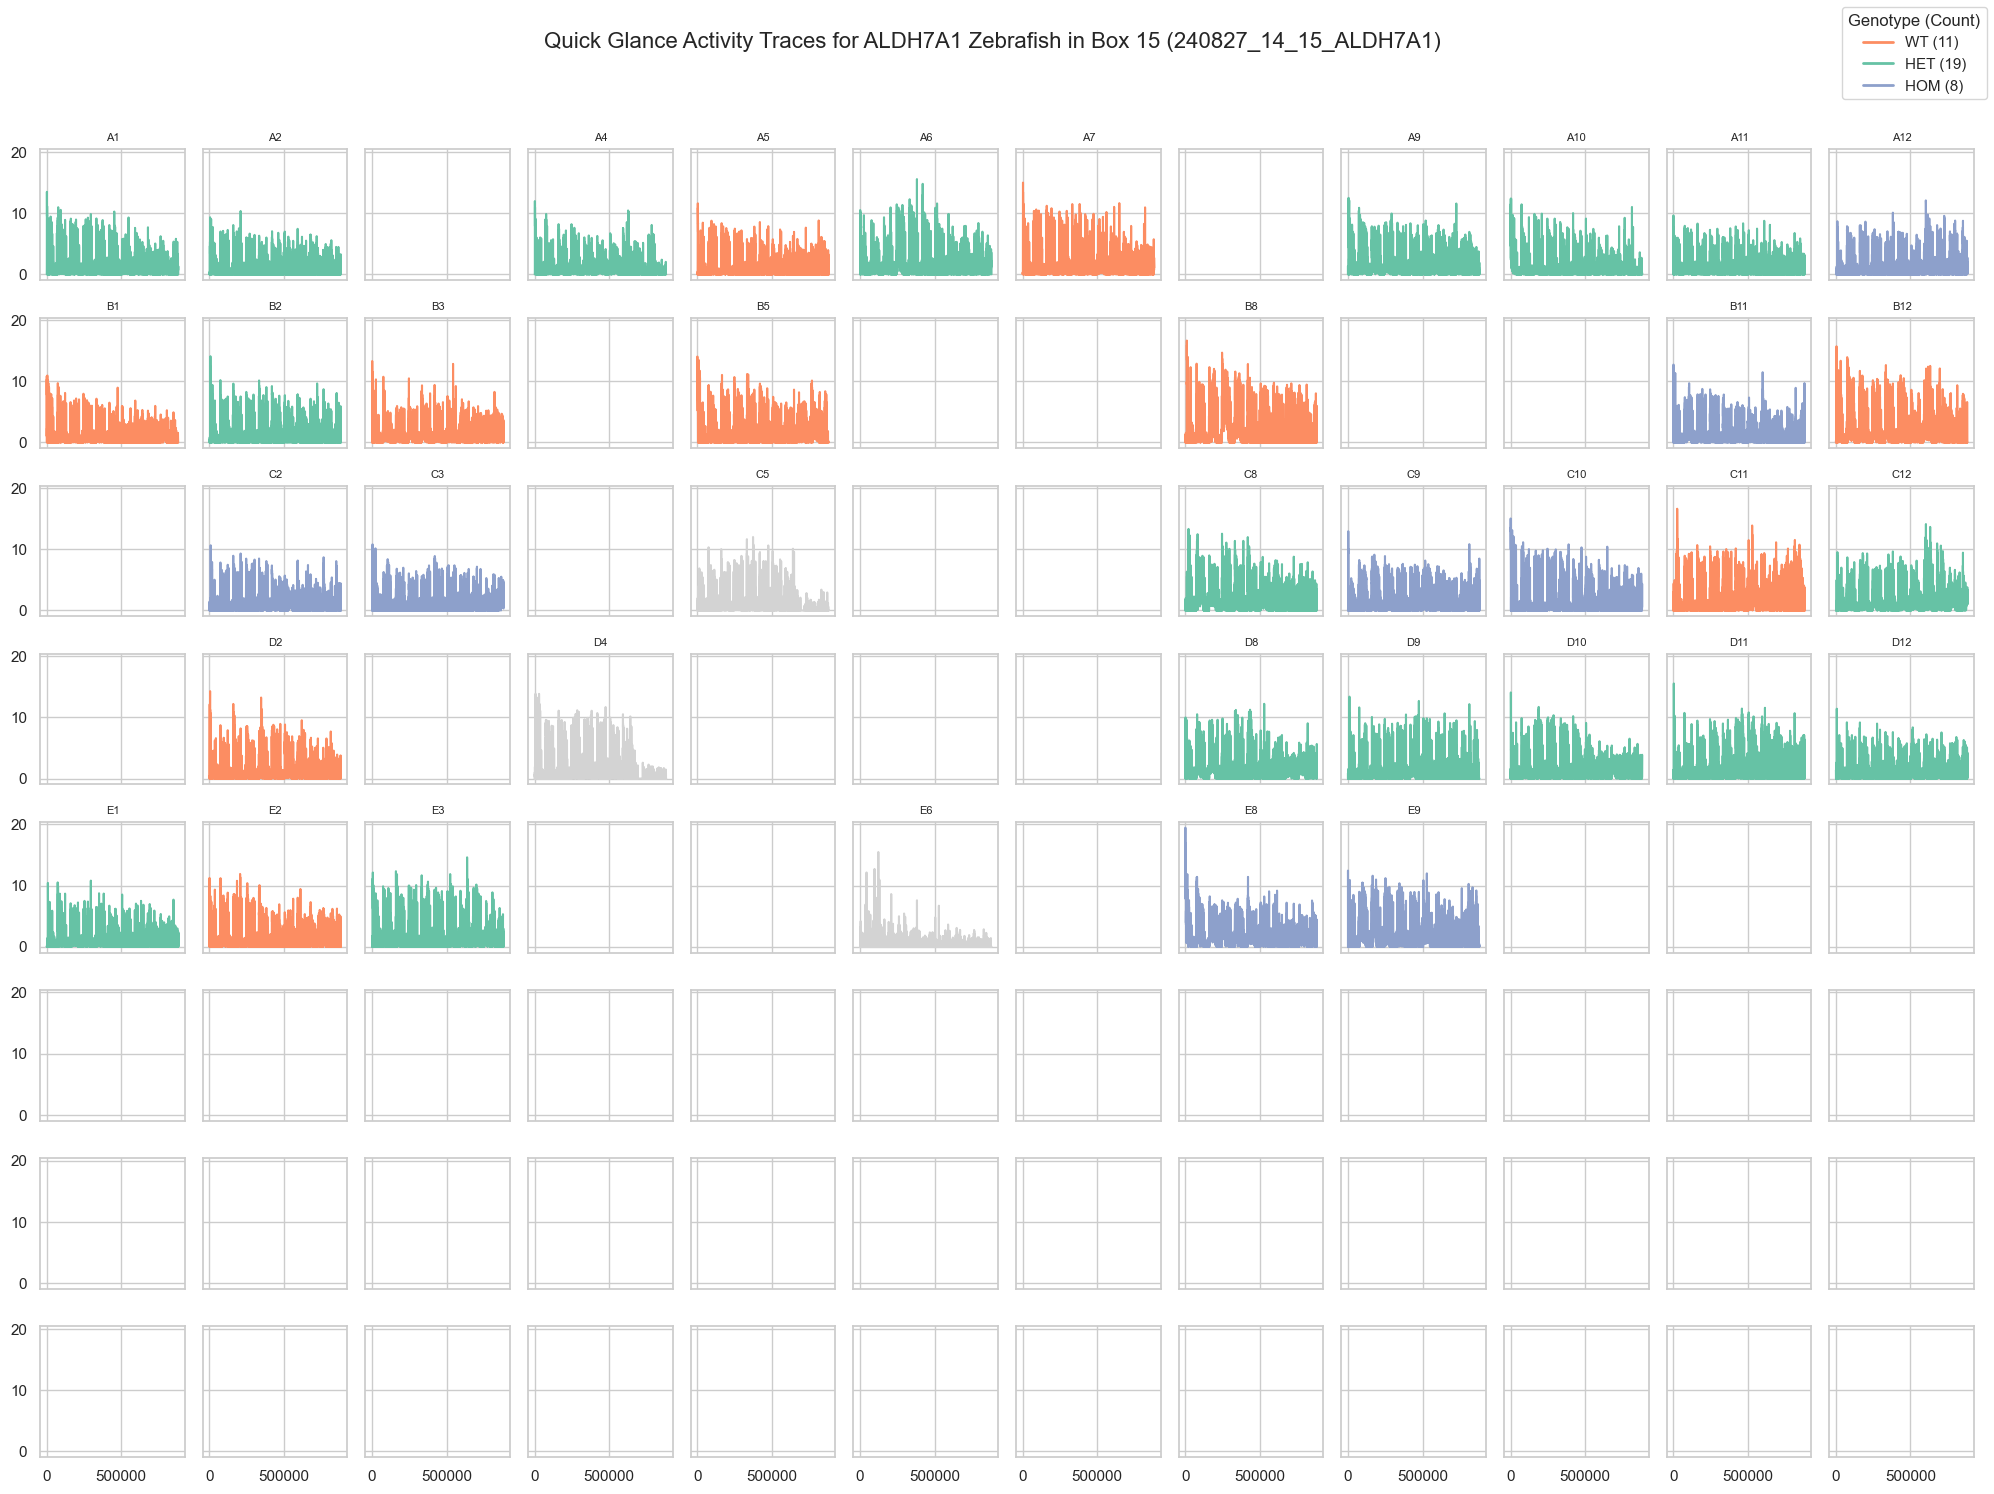

Quick plots, done.


In [155]:
#Middur output NOT FOR Sleep Analysis
# Define input variables
date   = "240827"
box1   = "14"
box2   = "15"
exp    = "ALDH7A1"
export = False

omit = {
        '14':['F4'],
        '15':['C5','D4','E6']
       }

aldh7a1_obj  = b6.MiddurData(date, box1, box2, exp, export, omit=omit) #.prepped_data attribute to access df
aldh7a1_obj.quick_plot_per_fish()

df, df_filtered = aldh7a1_obj.prepped_data, aldh7a1_obj.prepped_filtered_data


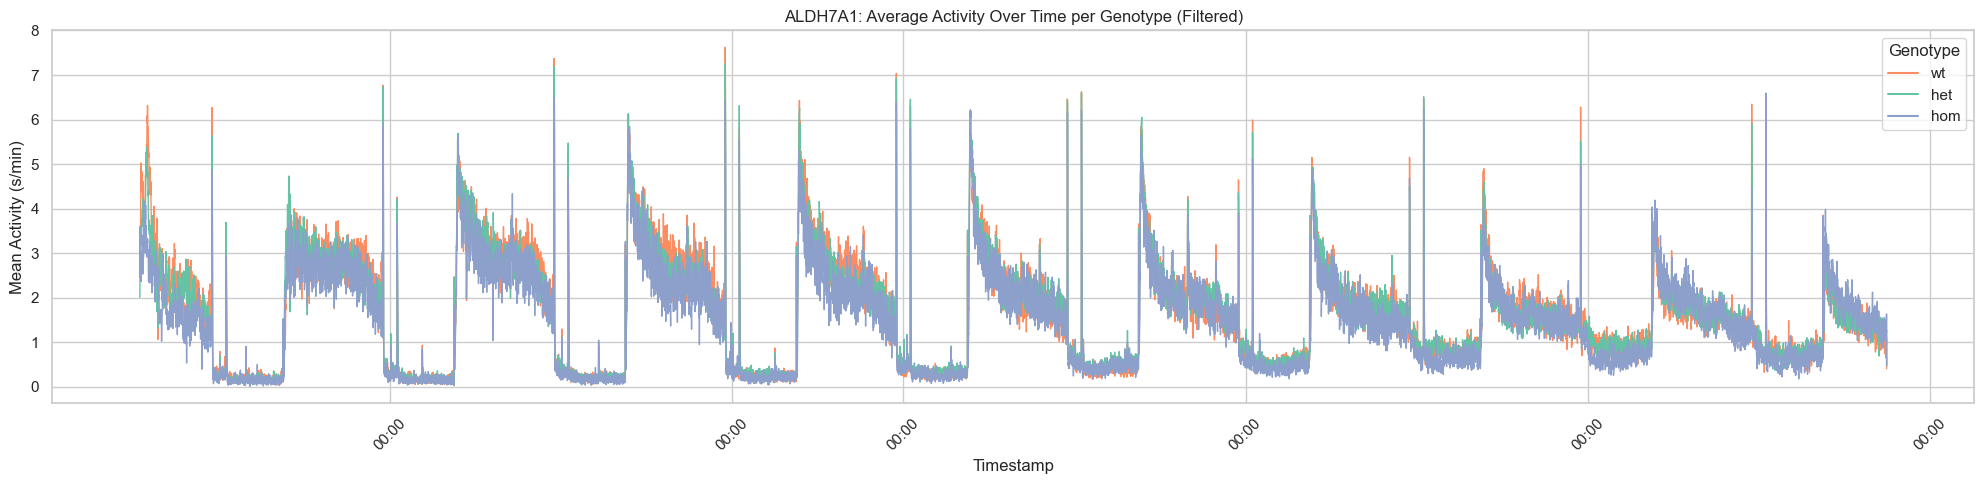

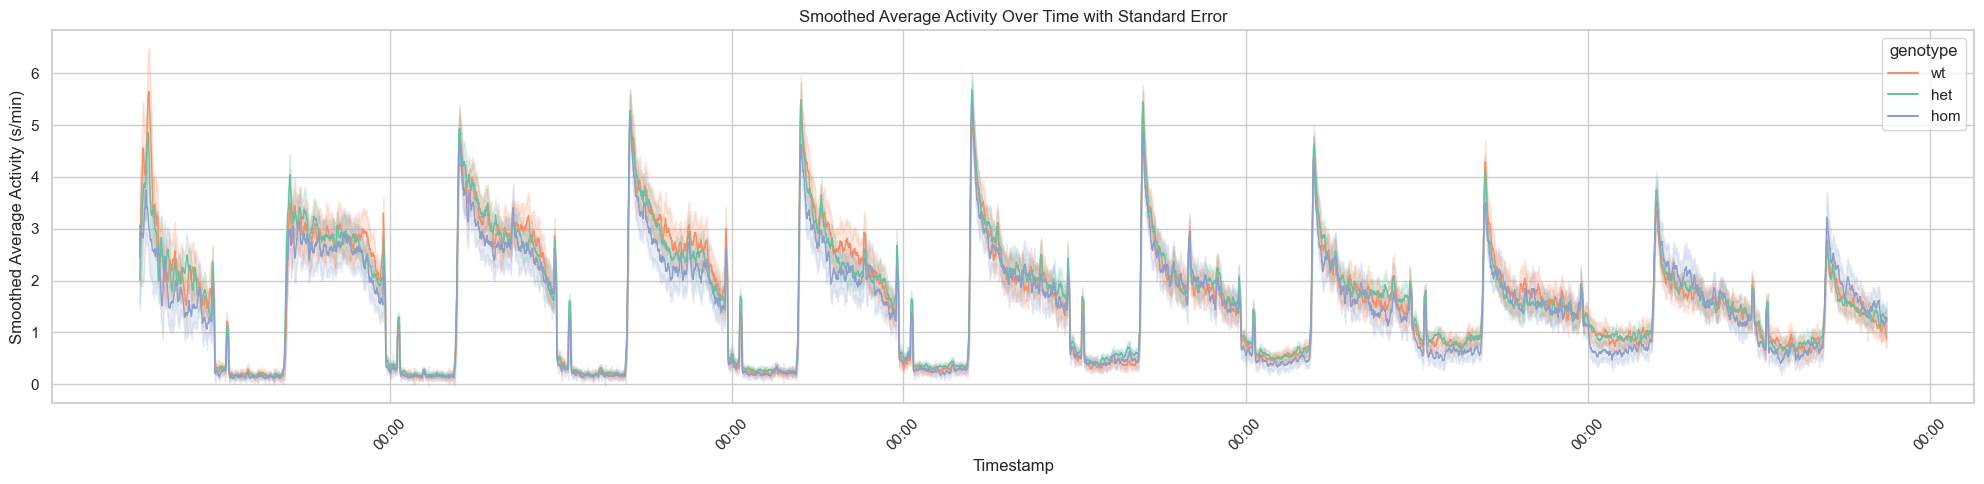

In [170]:


grouped_df_filtered = df_filtered.groupby(['genotype','stdate_sttime'])['middur'].agg(['mean', 'median', 'std', 'min', 'max', 'count','sum'])

plot_timeseries(grouped_df_filtered)
    

Finished prepping data.
Drawing quick plots...
Wells to omit for box 14: ['C6']


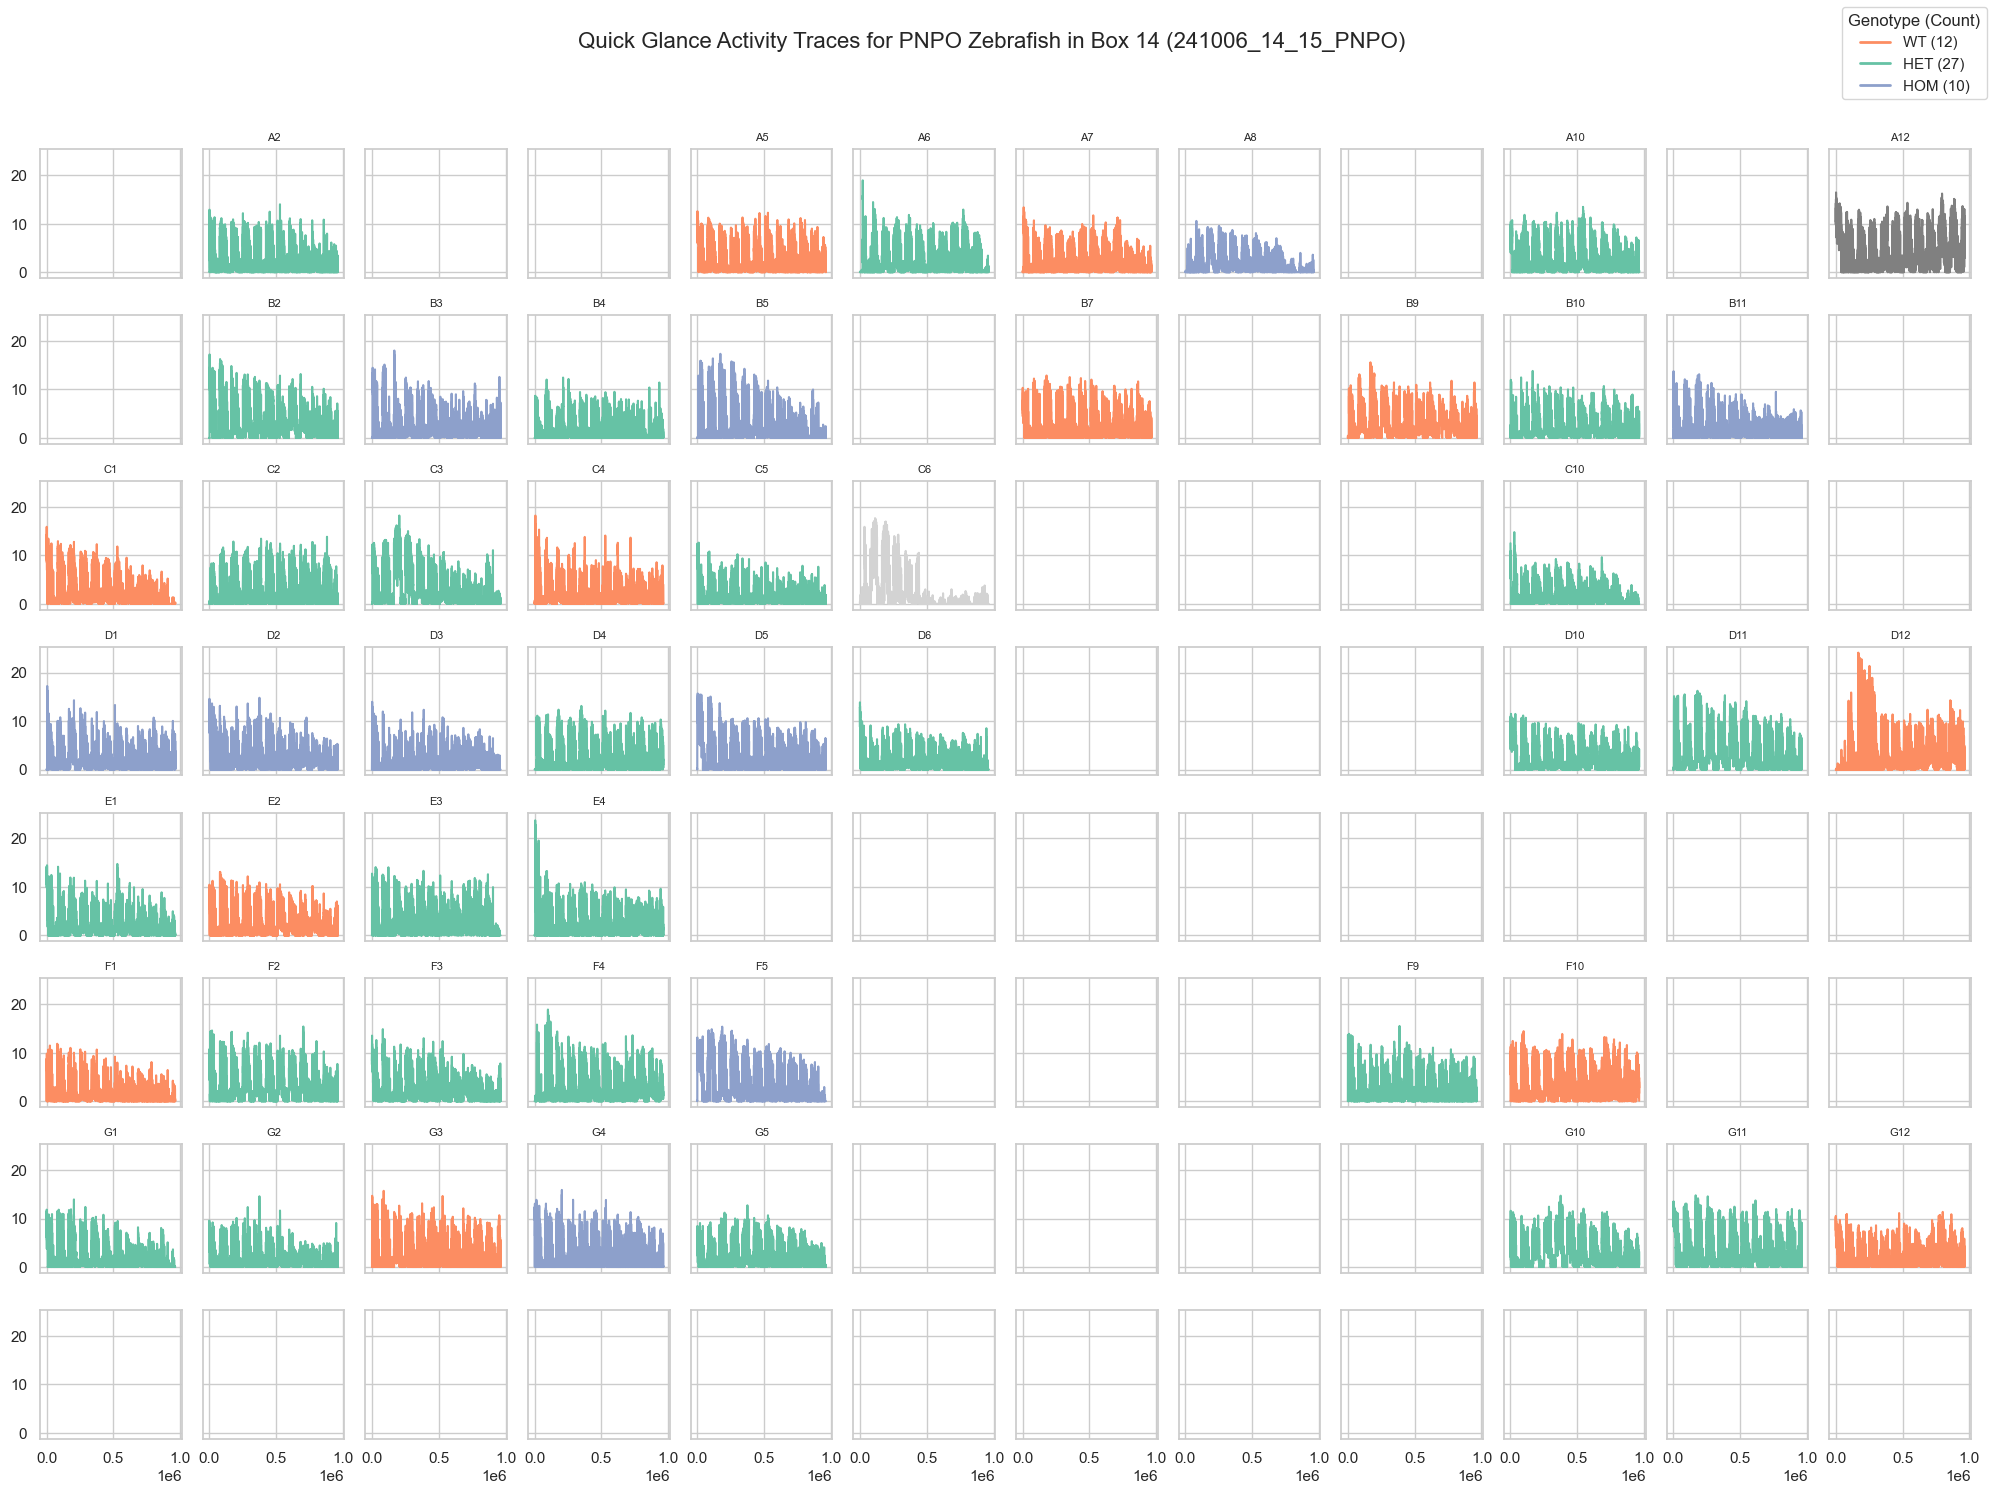

Wells to omit for box 15: ['C7', 'C9', 'D9', 'D7', 'G6', 'G7', 'G8']


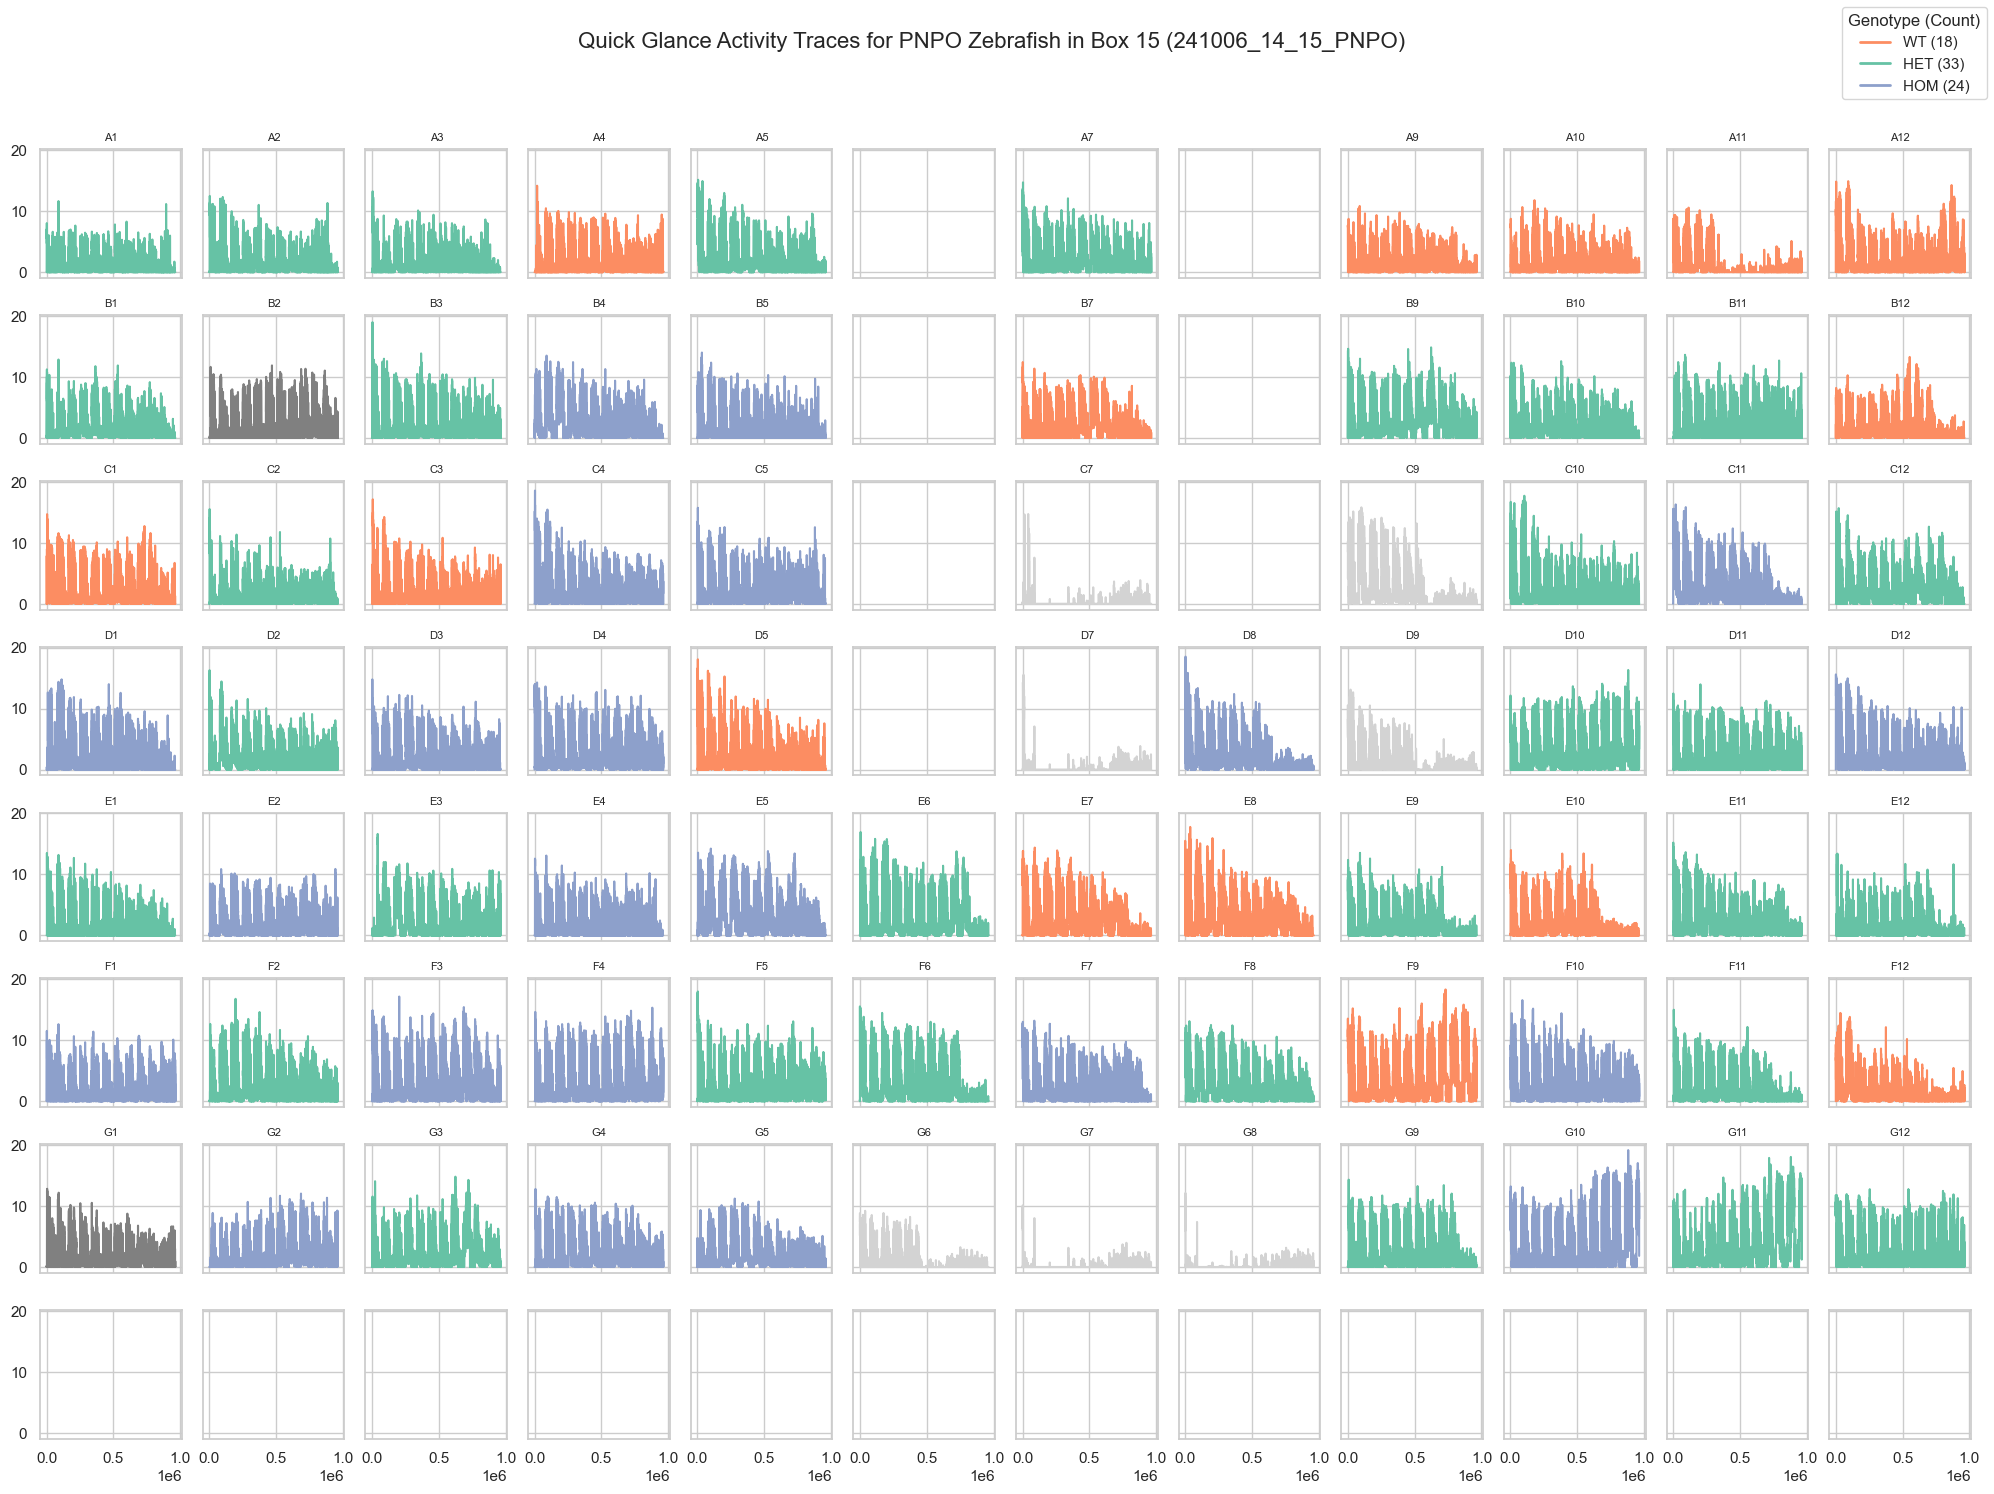

Quick plots, done.


In [148]:
#Middur output NOT FOR Sleep Analysis
# Define input variables
date   = "241006"
box1   = "14"
box2   = "15"
exp    = "PNPO"
export = False

omit = {'14':['C6'],
        '15':['C7','C9','D9','D7','G6','G7','G8']  
       }

pnpo_obj  = b6.MiddurData(date, box1, box2, exp, export, omit=omit) #.prepped_data attribute to access df
pnpo_obj.quick_plot_per_fish()

In [ ]:

grouped_df_filtered = df_filtered.groupby(['genotype','stdate_sttime'])['middur'].agg(['mean', 'median', 'std', 'min', 'max', 'count','sum'])

plot_timeseries(grouped_df_filtered)

Finished prepping data.
Drawing quick plots...
No wells to omit for box 16.


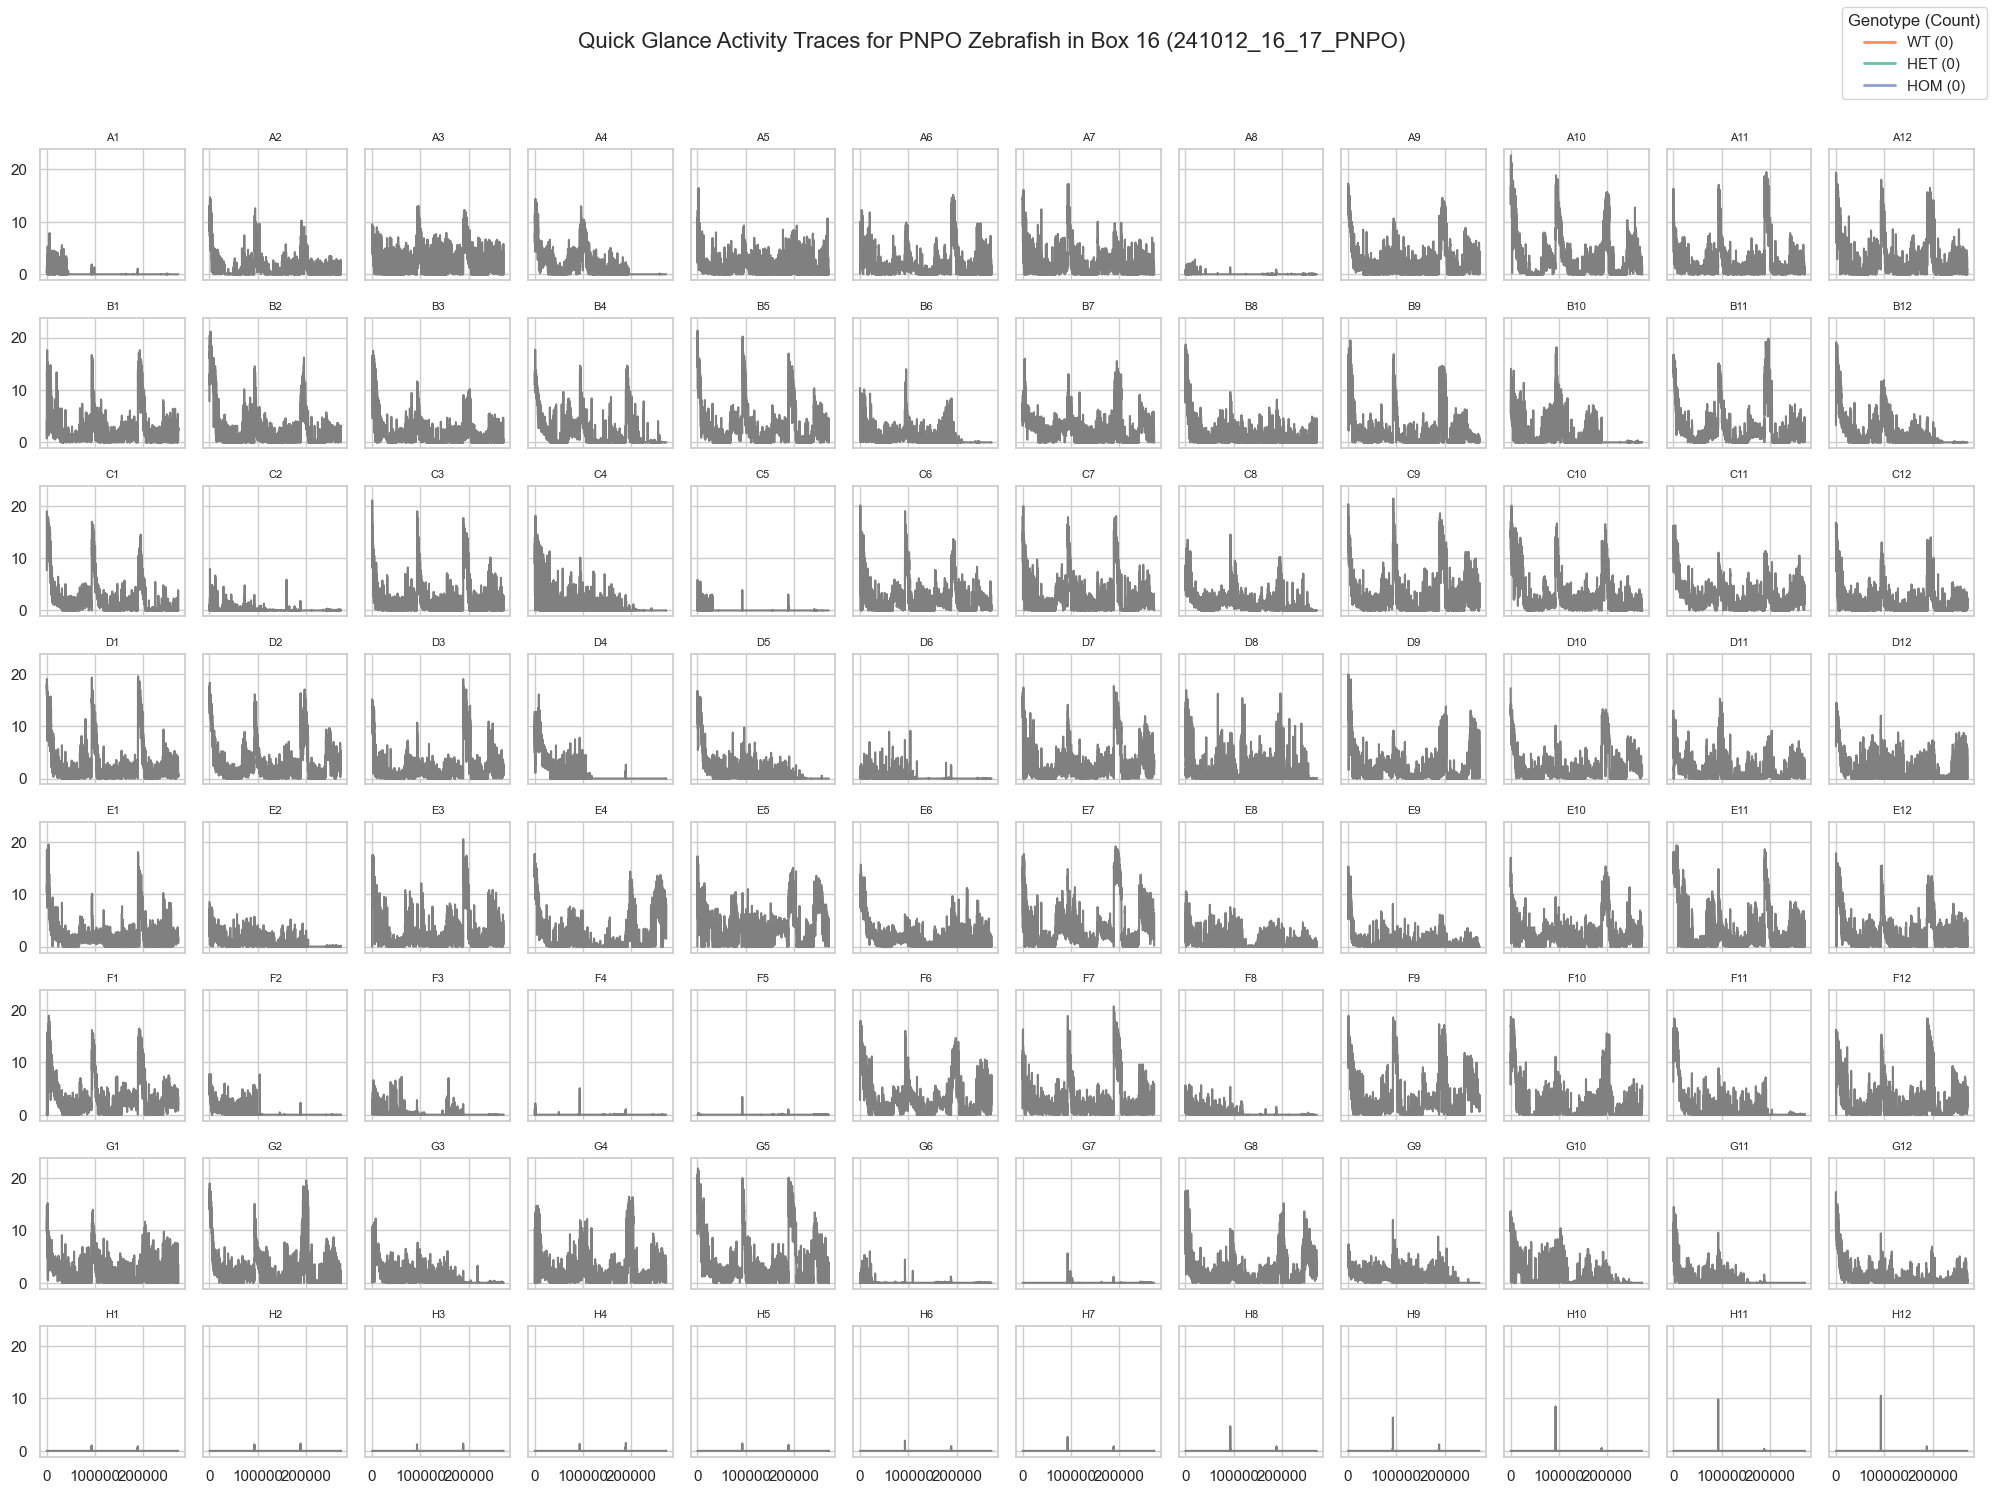

Wells to omit for box 17: ['B5', 'B10', 'C2', 'C3', 'C4', 'C6', 'C8', 'C10', 'C11', 'D2', 'D8', 'D12', 'E11', 'F3', 'F9', 'F10', 'F11', 'G1', 'H4', 'H7', 'H12']


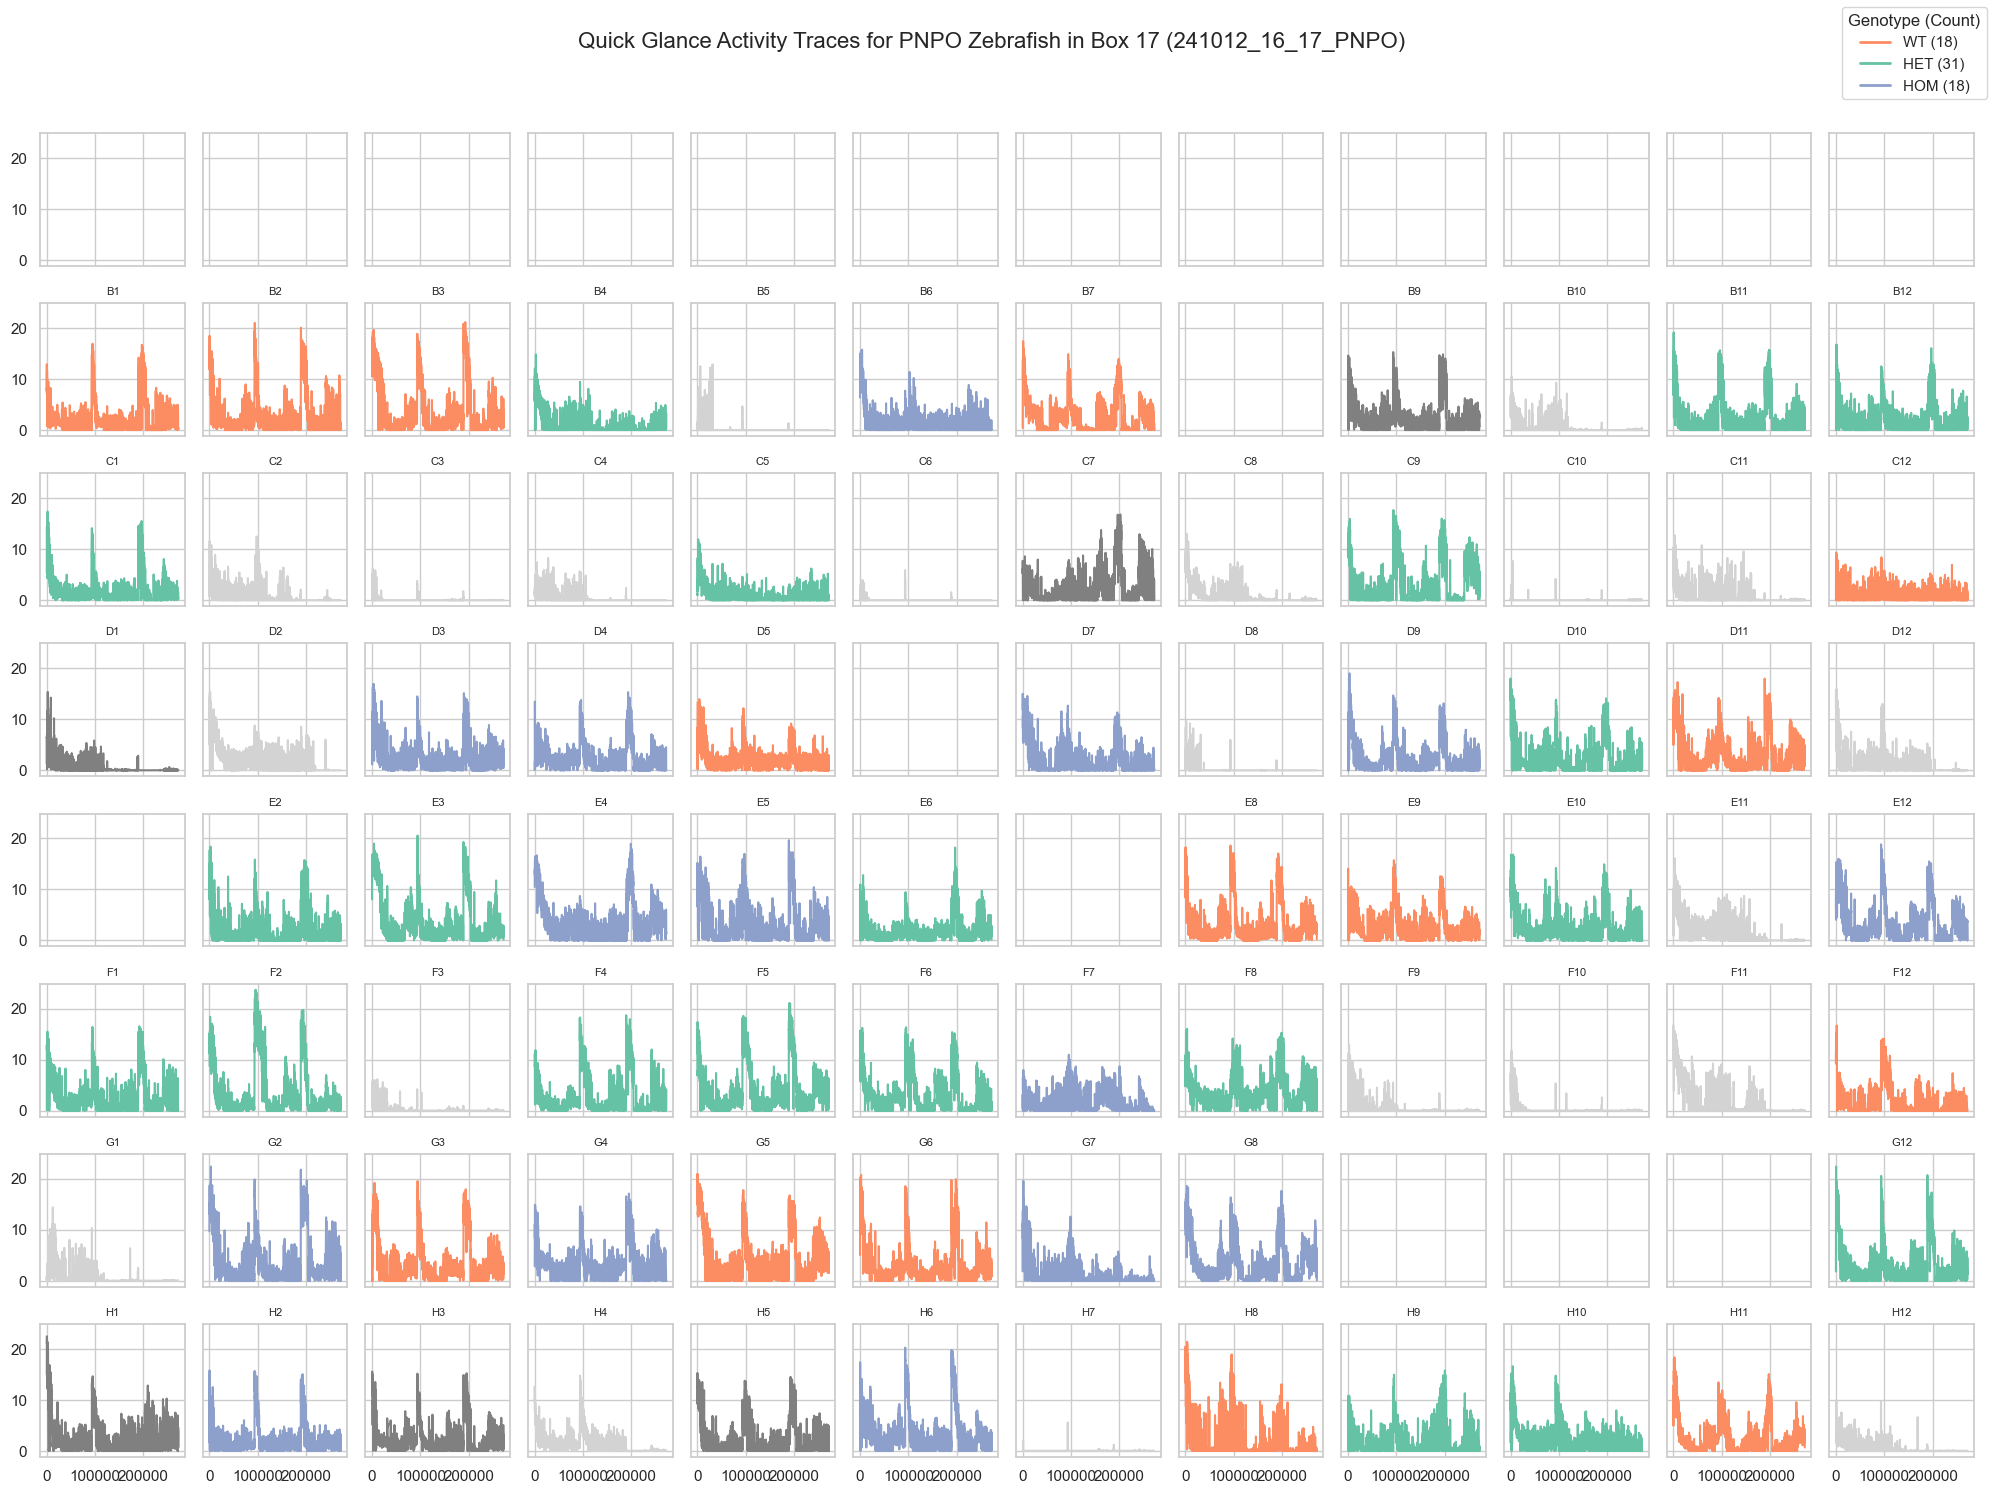

Quick plots, done.


In [198]:
# Define input variables
date   = "241012"
box1   = "16"
box2   = "17"
exp    = "PNPO"
export = False

omit = {'17':['B5','B10','C2','C3','C4','C6','C8','C10','C11','D2','D8','D12','E11','F3','F9','F10','F11','G1','H4','H7','H12']}

pnpo_241012_obj = b6.MiddurData(date, box1, box2, exp, export, omit=omit) #.prepped_data attribute to access df
pnpo_241012_obj.quick_plot_per_fish()
df, df_filtered = pnpo_241012_obj.prepped_data, pnpo_241012_obj.prepped_filtered_data


Finished prepping data.
Drawing quick plots...
No wells to omit for box 14.


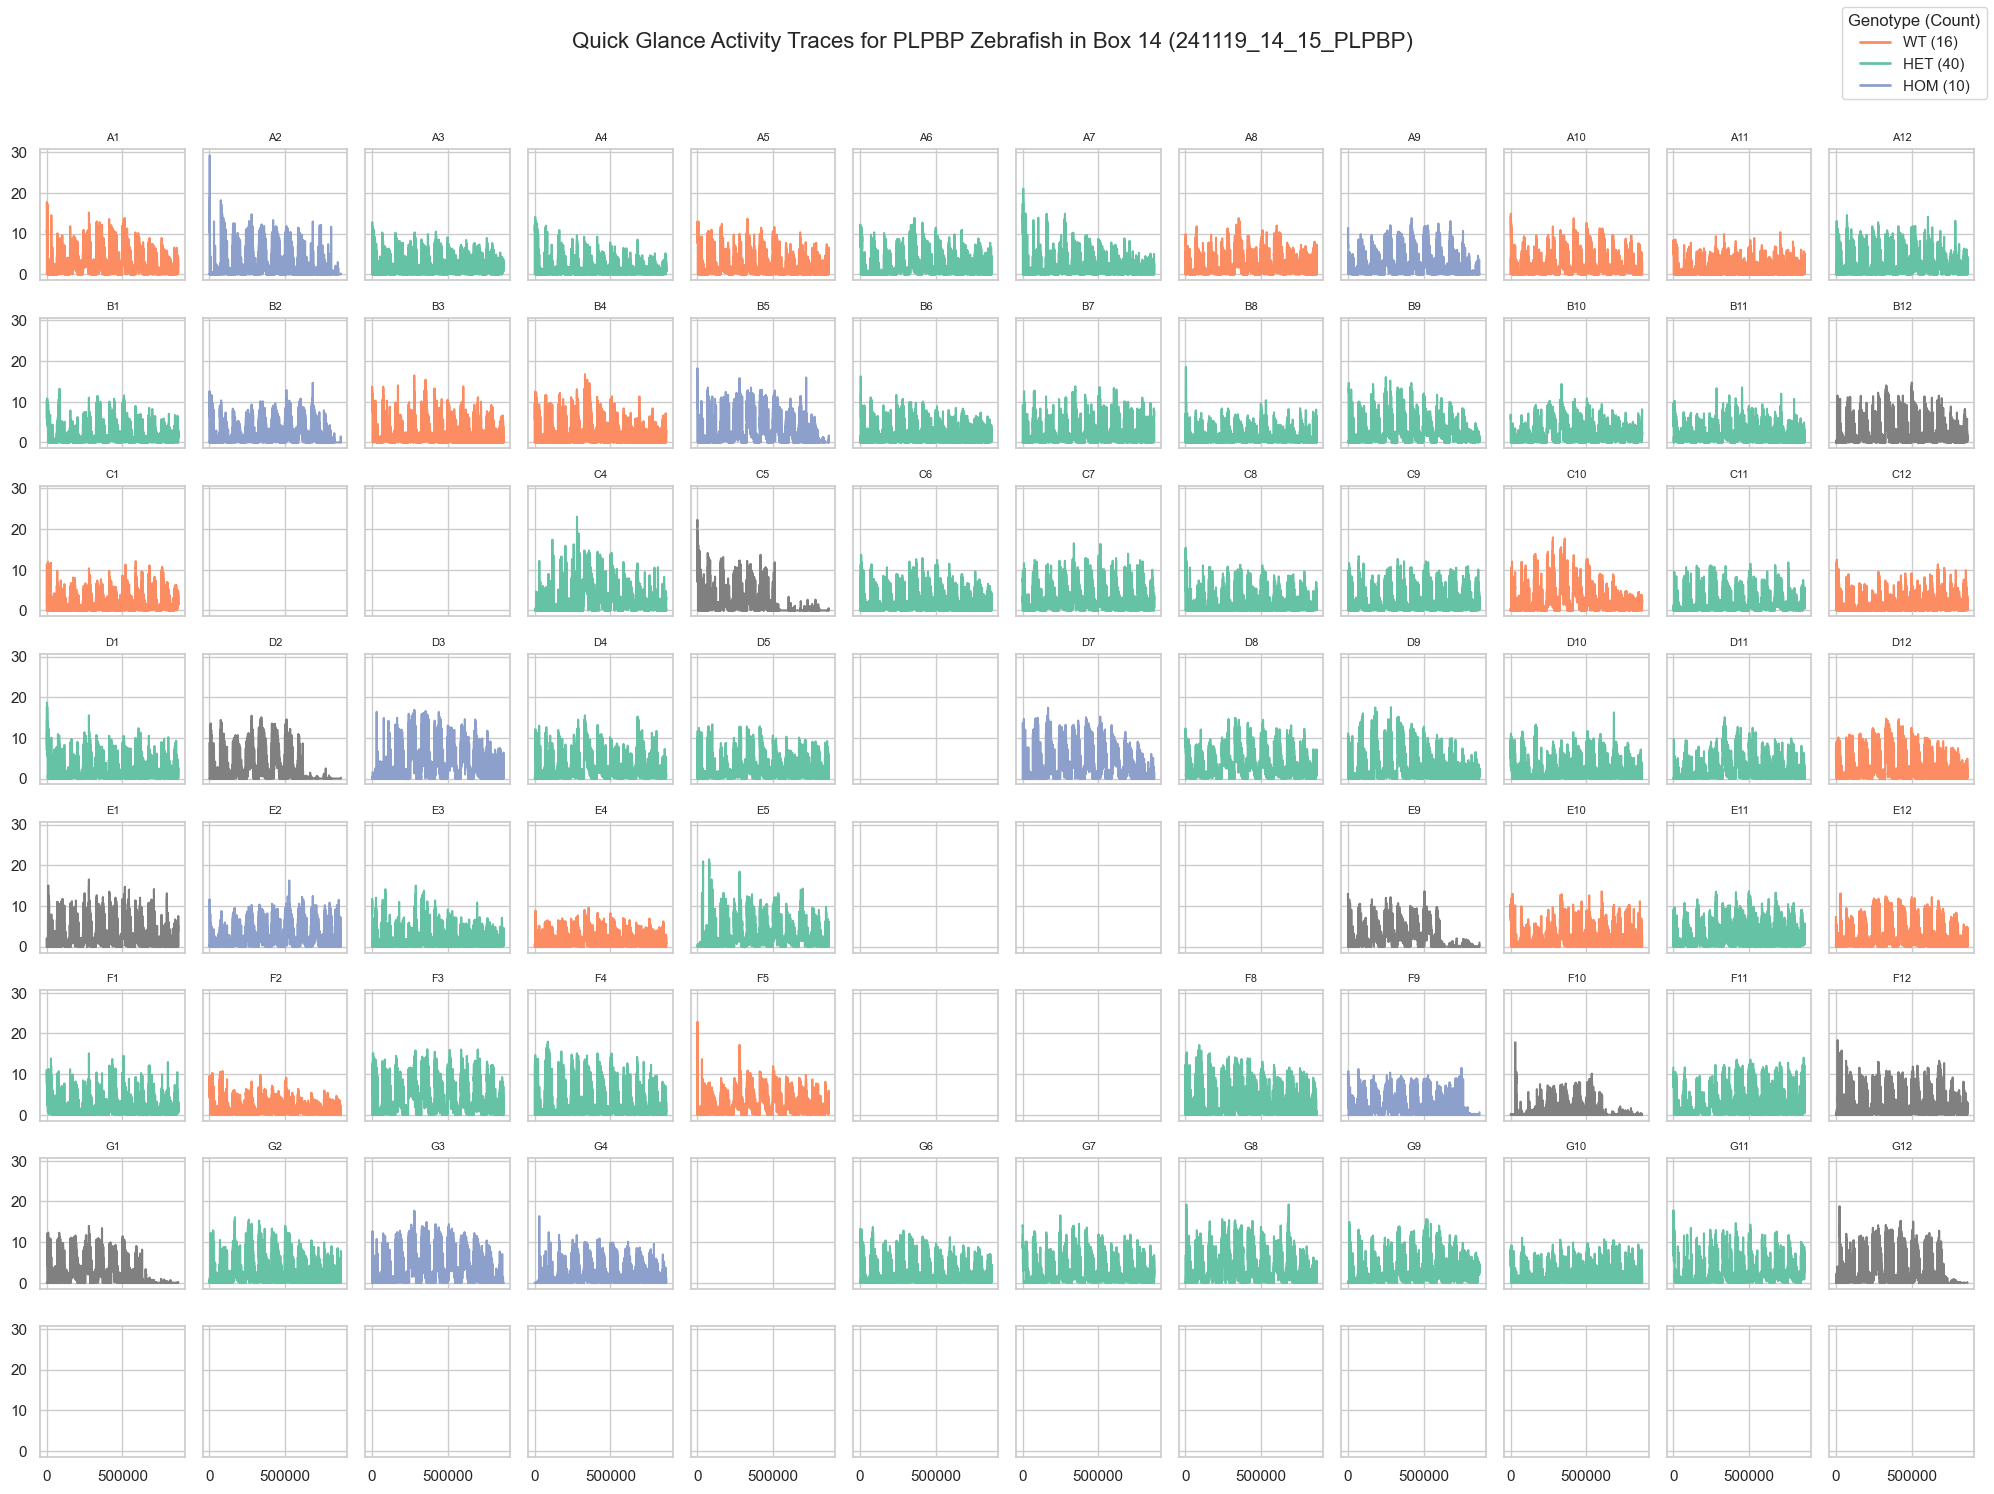

Wells to omit for box 15: ['F6', 'E6']


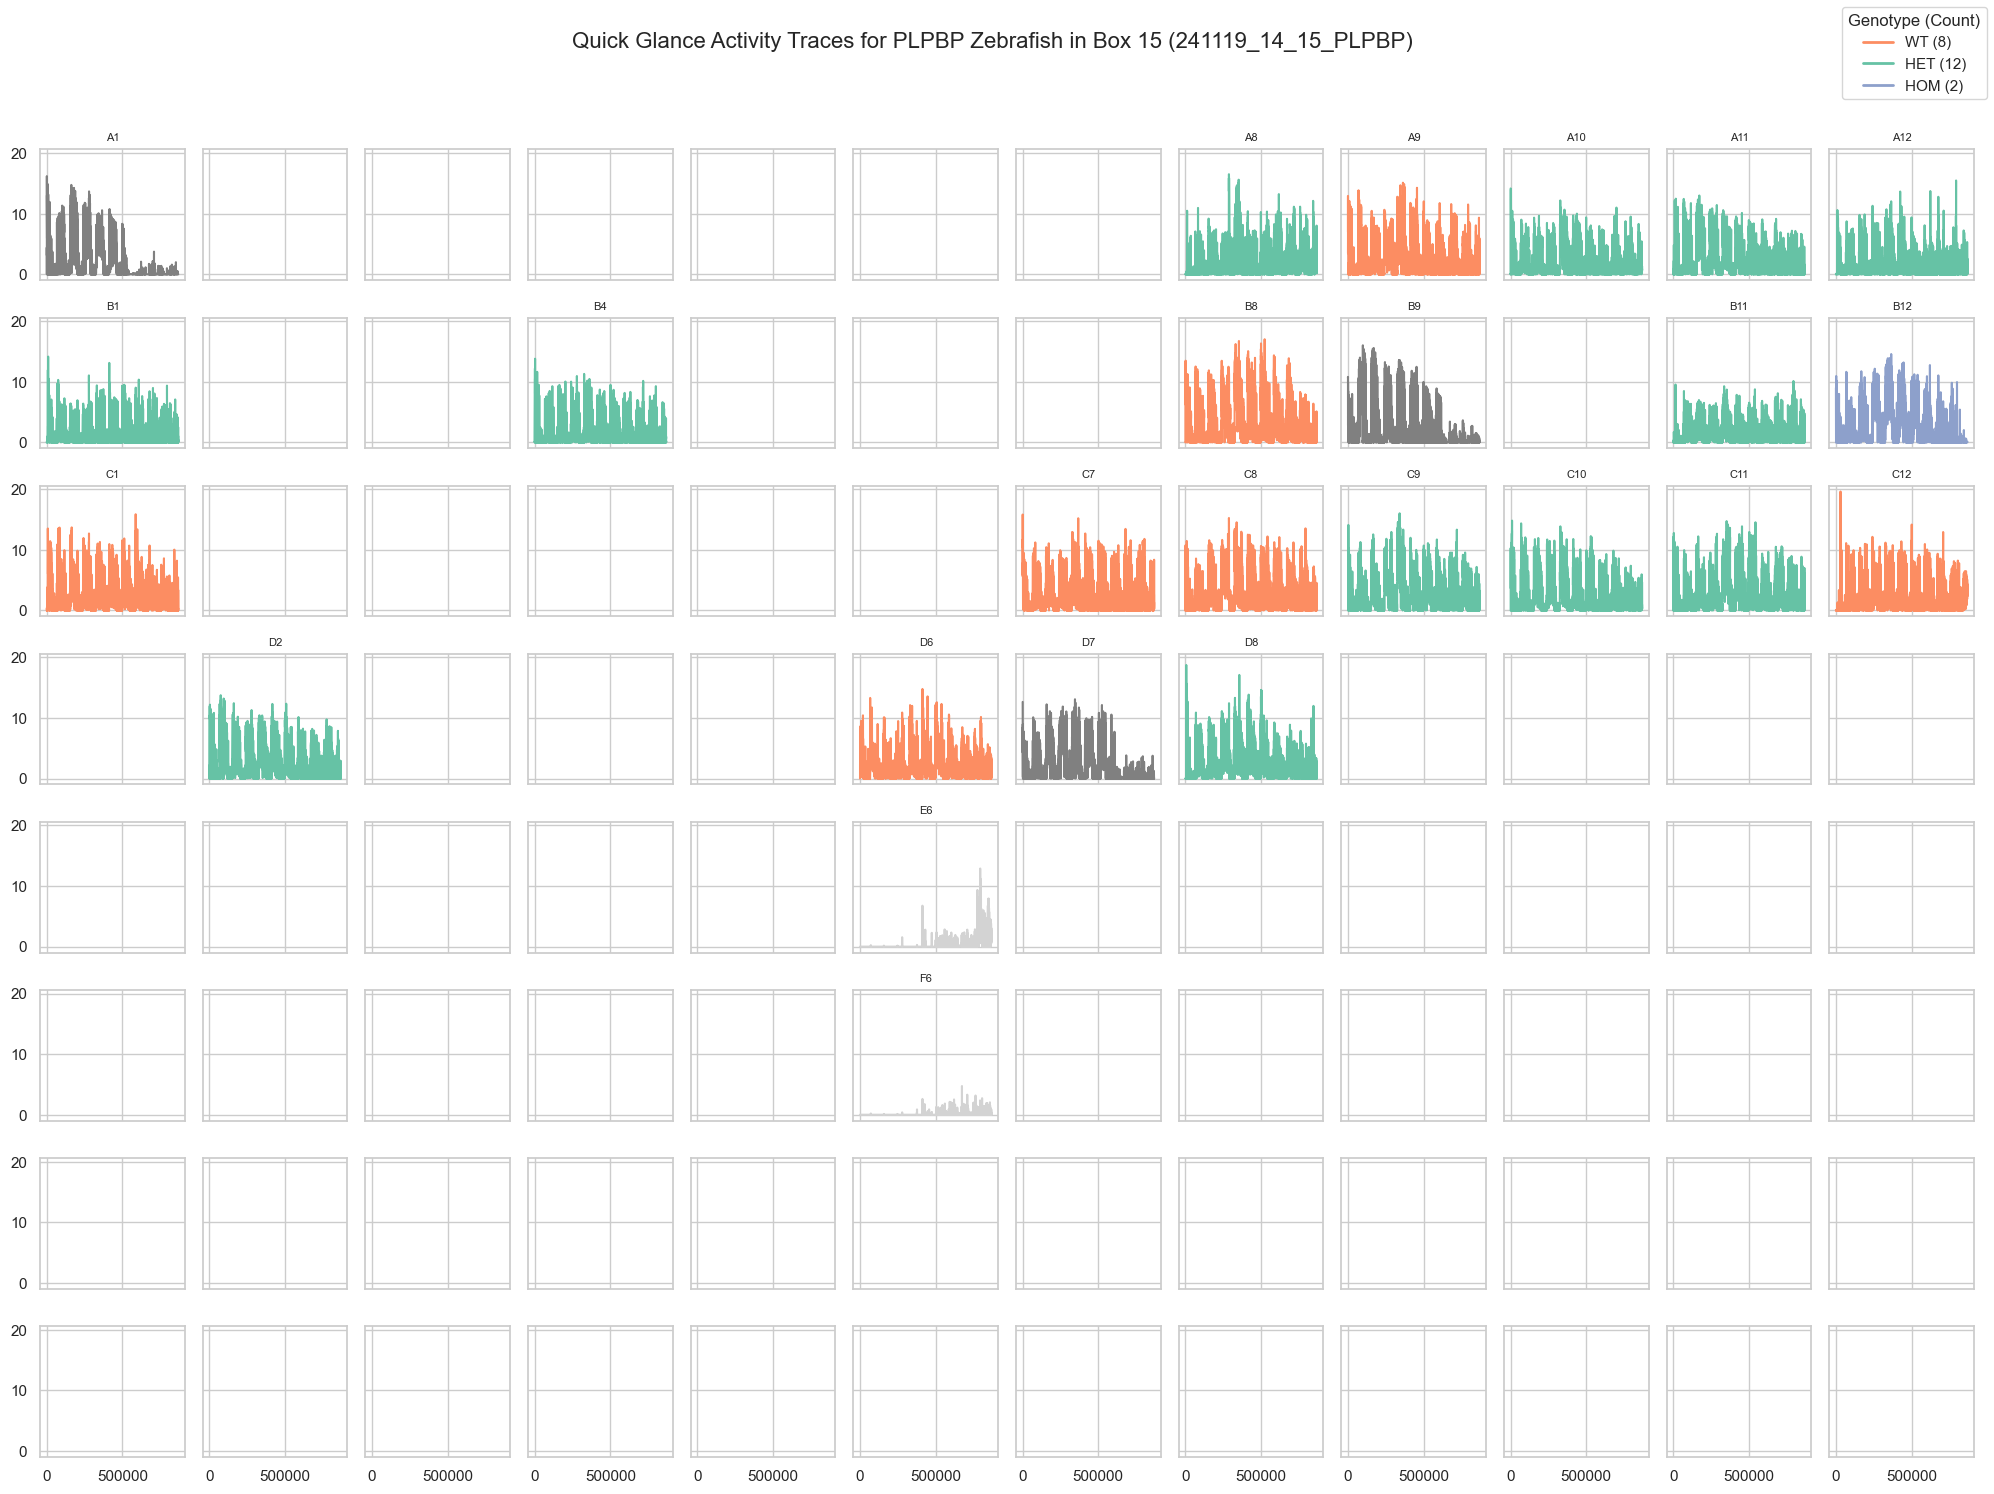

Quick plots, done.


In [202]:
date   = "241119"
box1   = "14"
box2   = "15"
exp    = "PLPBP"
export = False

omit = {'15':['F6','E6']}

plpbp_241129_obj = b6.MiddurData(date, box1, box2, exp, export, omit=omit) #.prepped_data attribute to access df
plpbp_241129_obj.quick_plot_per_fish()
df, df_filtered = plpbp_241129_obj.prepped_data, pnpo_241012_obj.prepped_filtered_data


In [206]:
# df[df['box']==14]

Empty DataFrame
Columns: [stdate_sttime, location, animal, start, end, middur, box, plate, well, genotype]
Index: []

In [229]:
box14_plpbp = df[(df['box'] == '14') & (df['genotype'] != 'excluded')]

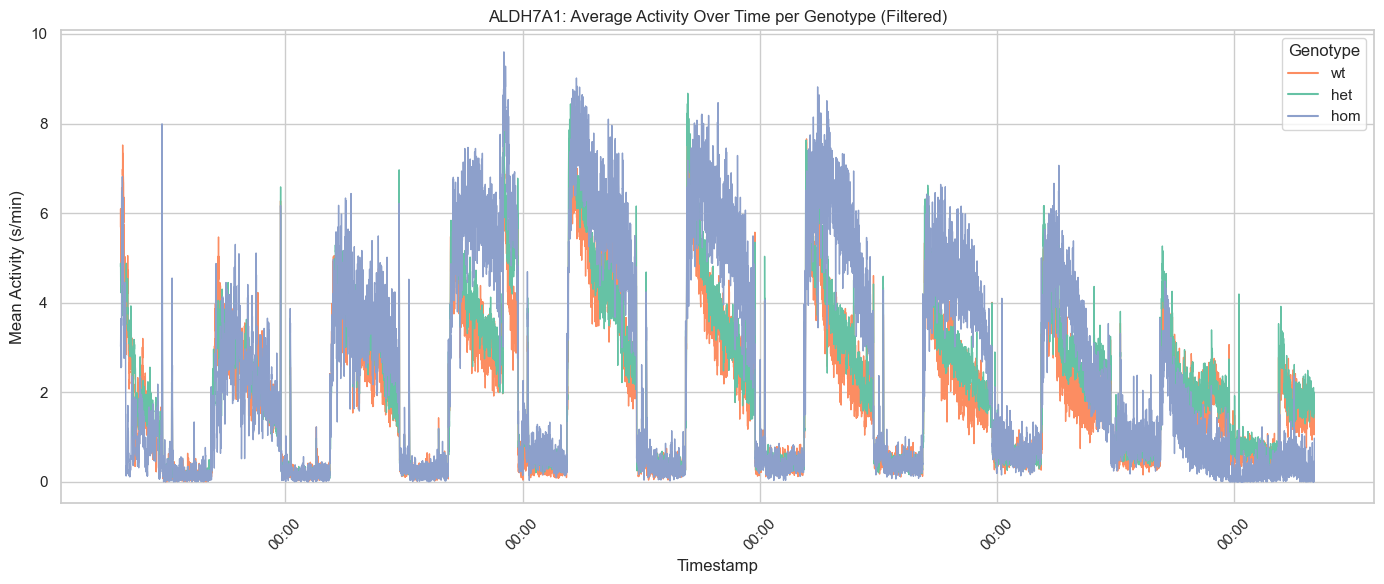

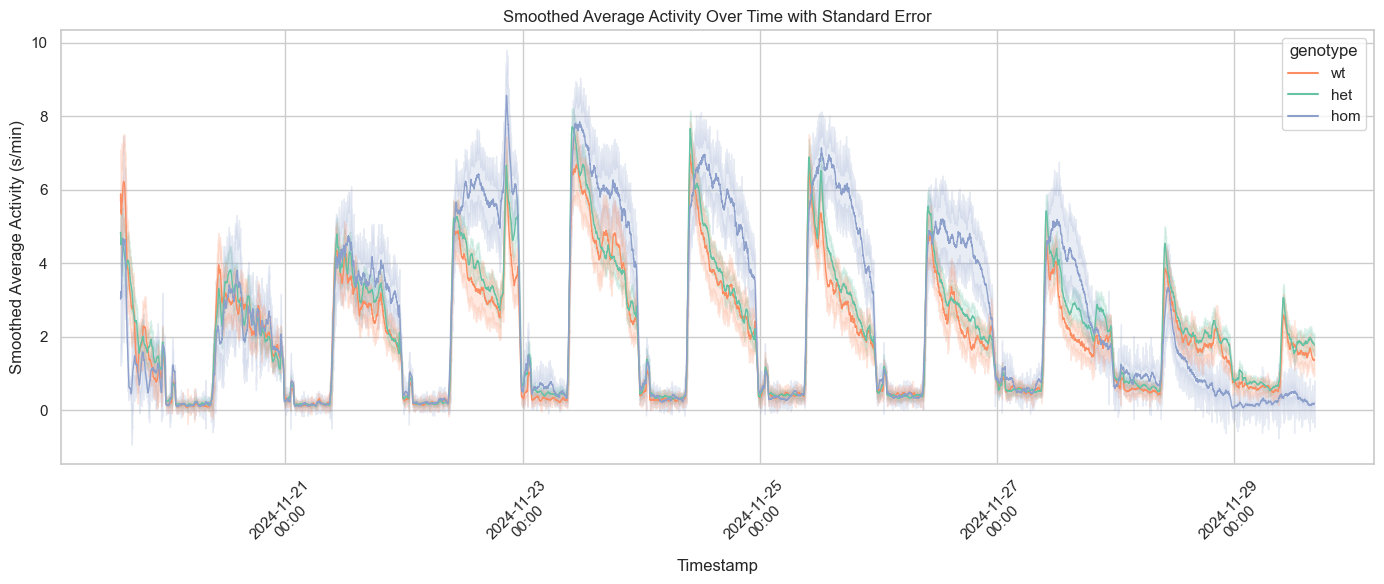

In [238]:
grouped_df = box14_plpbp.groupby(['genotype','stdate_sttime'])['middur'].agg(['mean', 'median', 'std', 'min', 'max', 'count','sum'])

plot_timeseries(grouped_df)

Drawing quick plots...
No wells to omit for box 16.


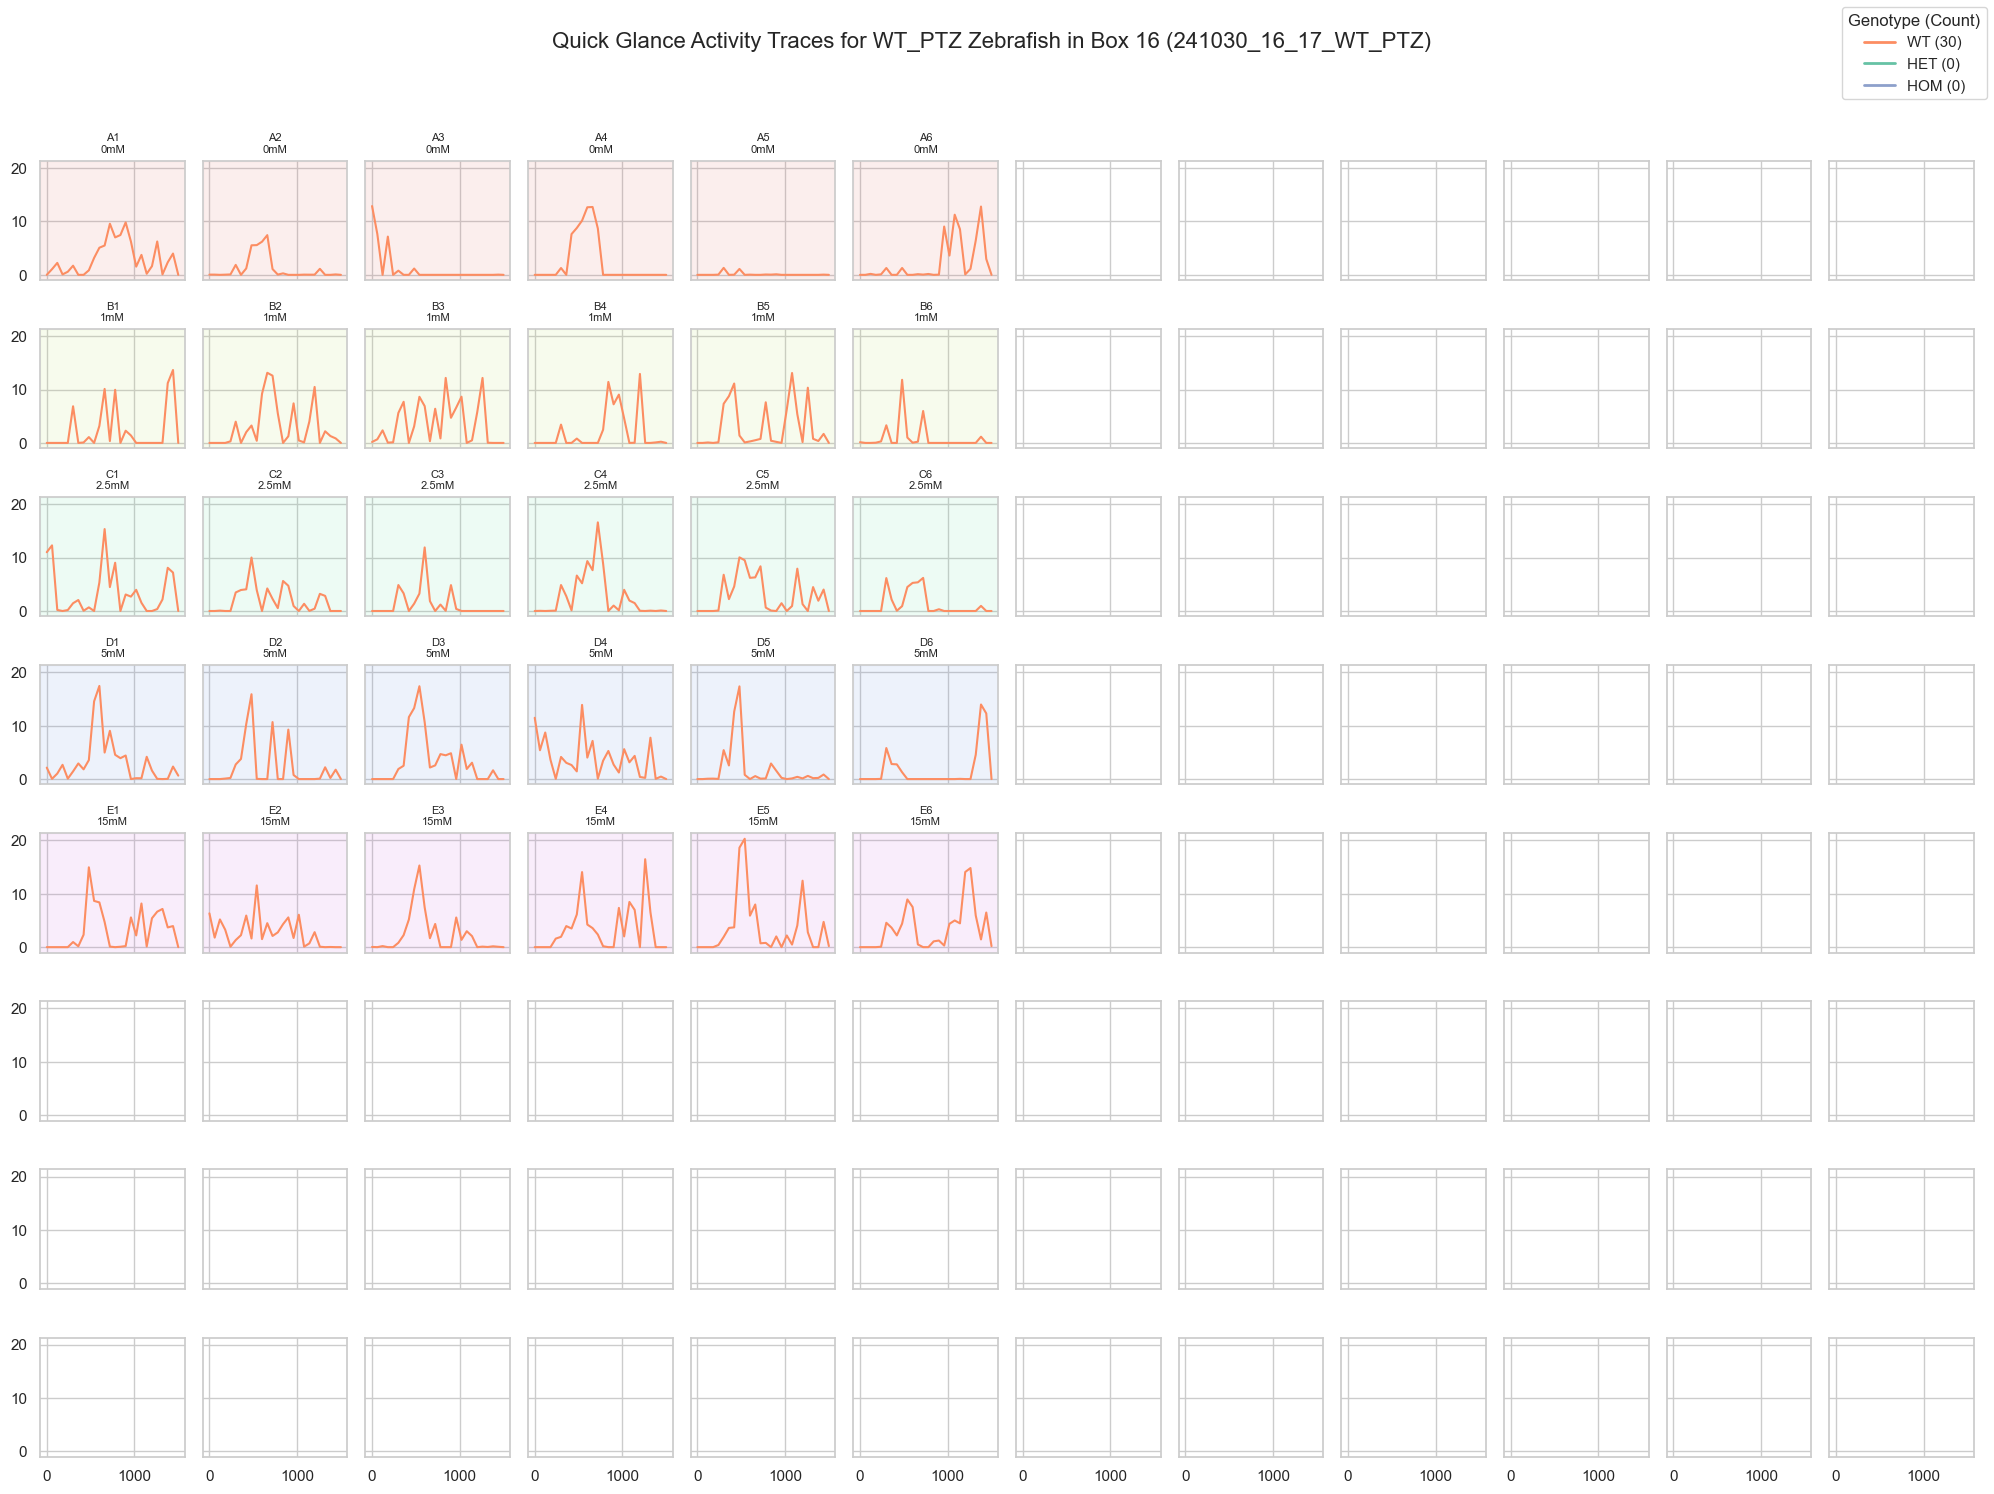

Quick plots, done.


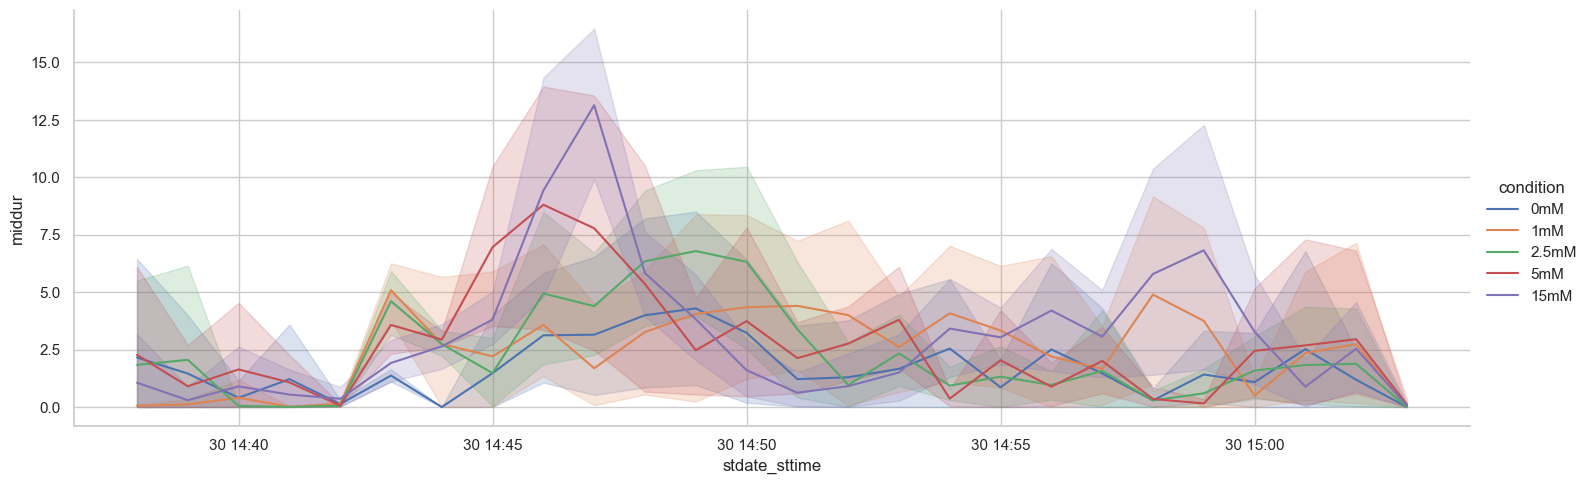

In [172]:
#Middur output NOT FOR Sleep Analysis
# Define input variables
date   = "241030"
box1   = "16"
box2   = "17"
exp    = "WT_PTZ"
export = False
    
# wt_ptz_obj = b6.MiddurData(date, box1, box2, exp, export) #.prepped_data attribute to access df
wt_ptz_obj.quick_plot_per_fish()

df = wt_ptz_obj.prepped_data

sns.relplot(x="stdate_sttime", y="middur",data=df, kind="line", hue='condition', aspect=3)


We have a condition!
No filtering applied: 'omit' is None.
Finished prepping data.
Drawing quick plots...
No wells to omit for box 16.


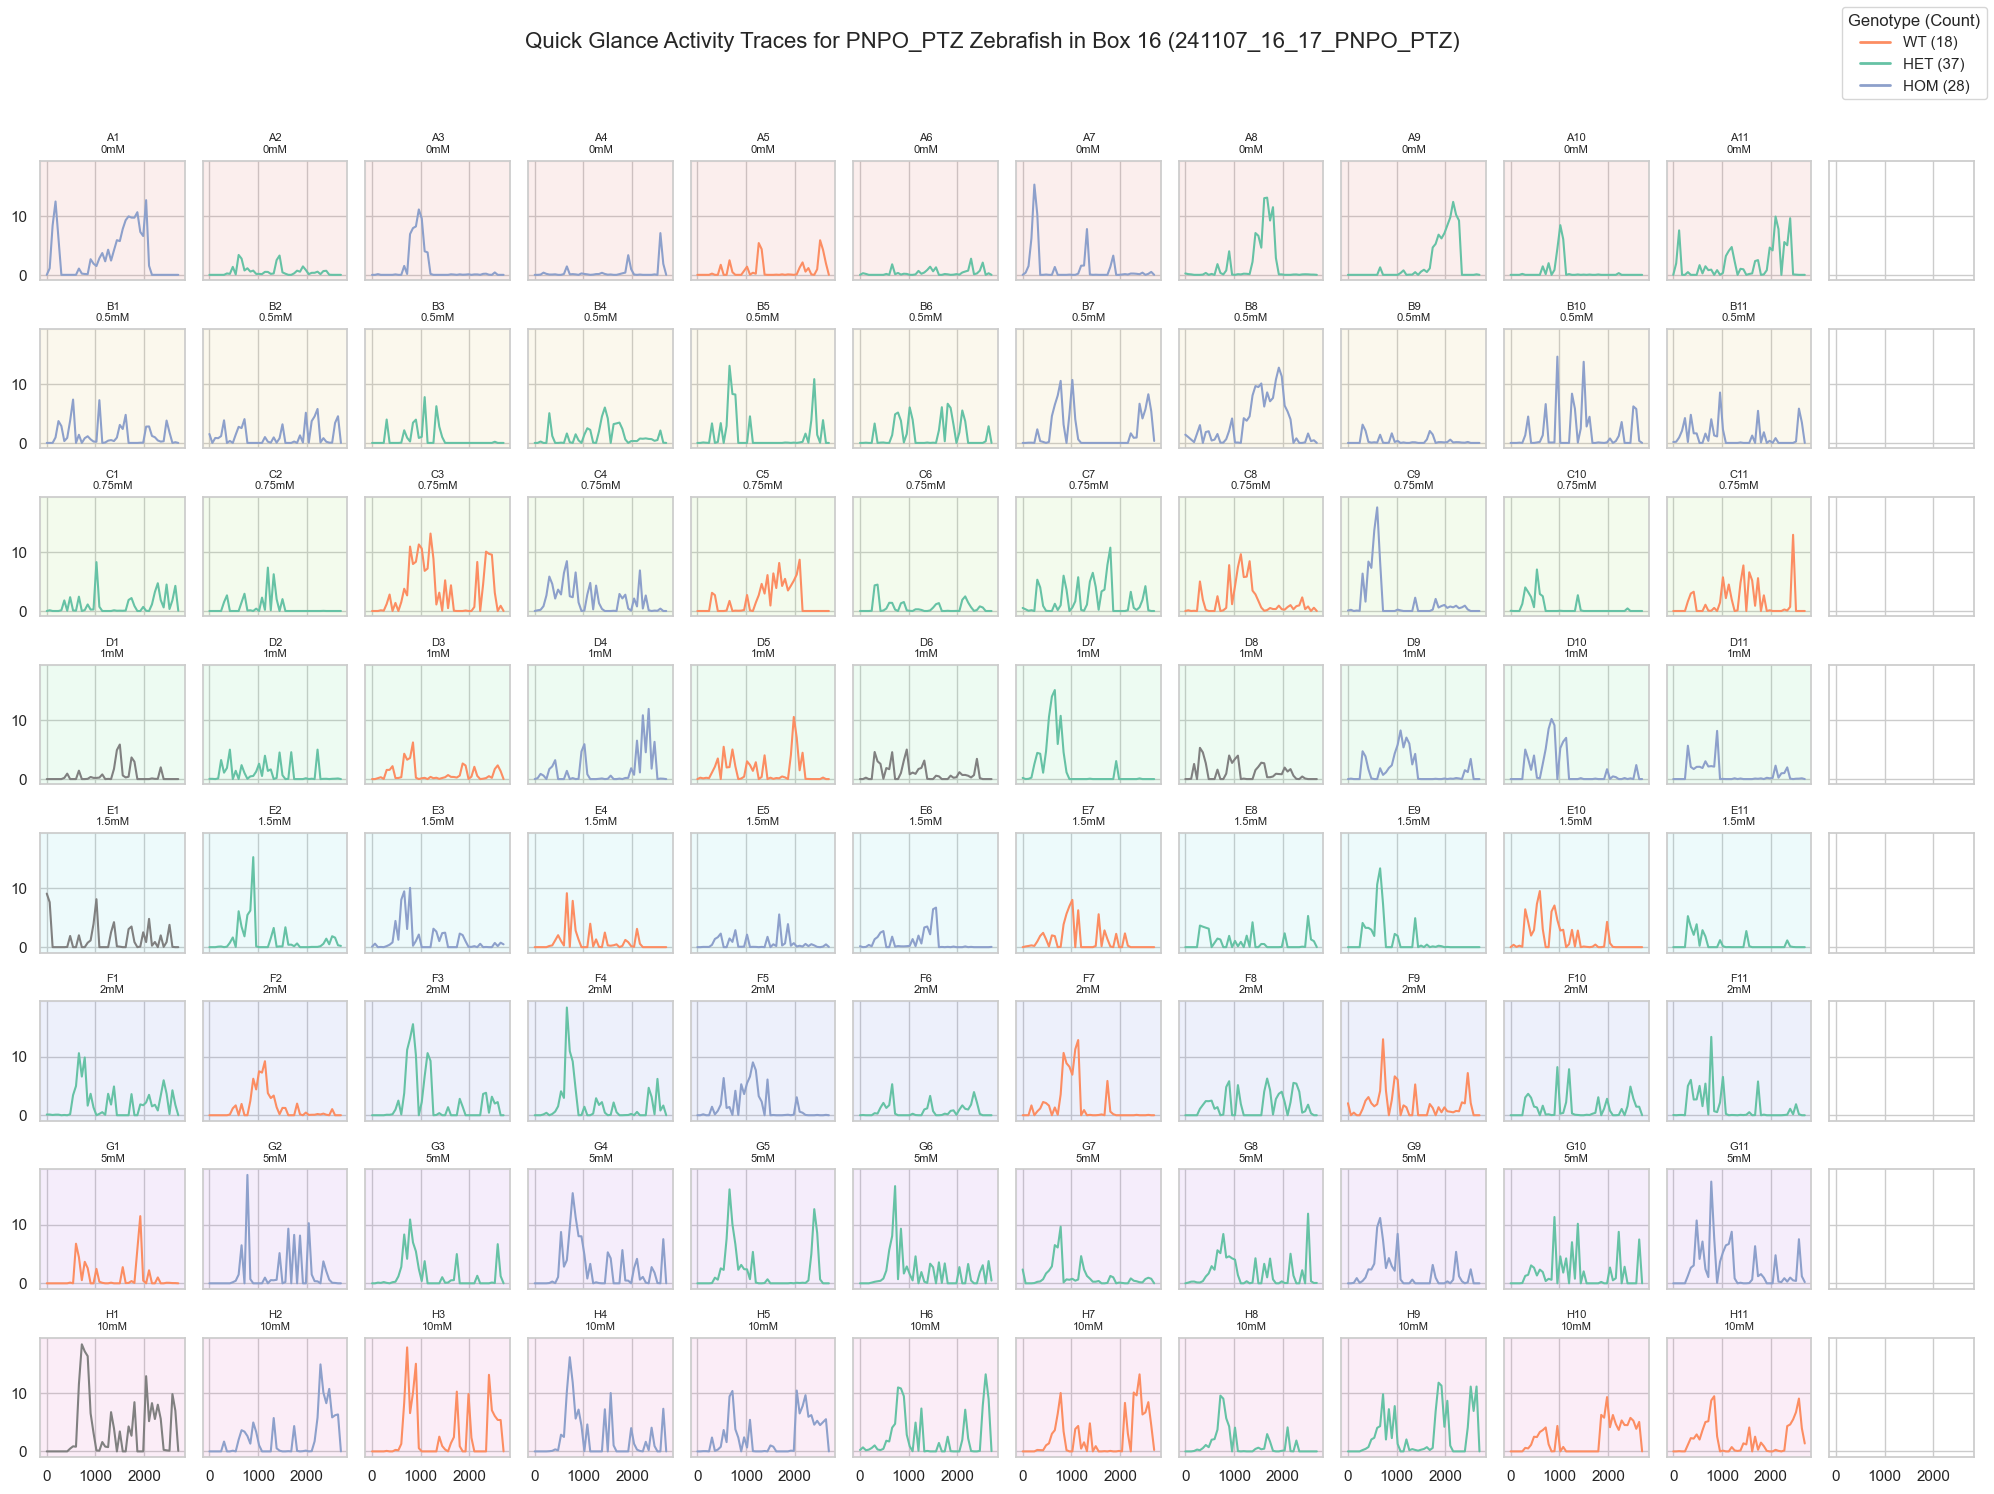

Quick plots, done.


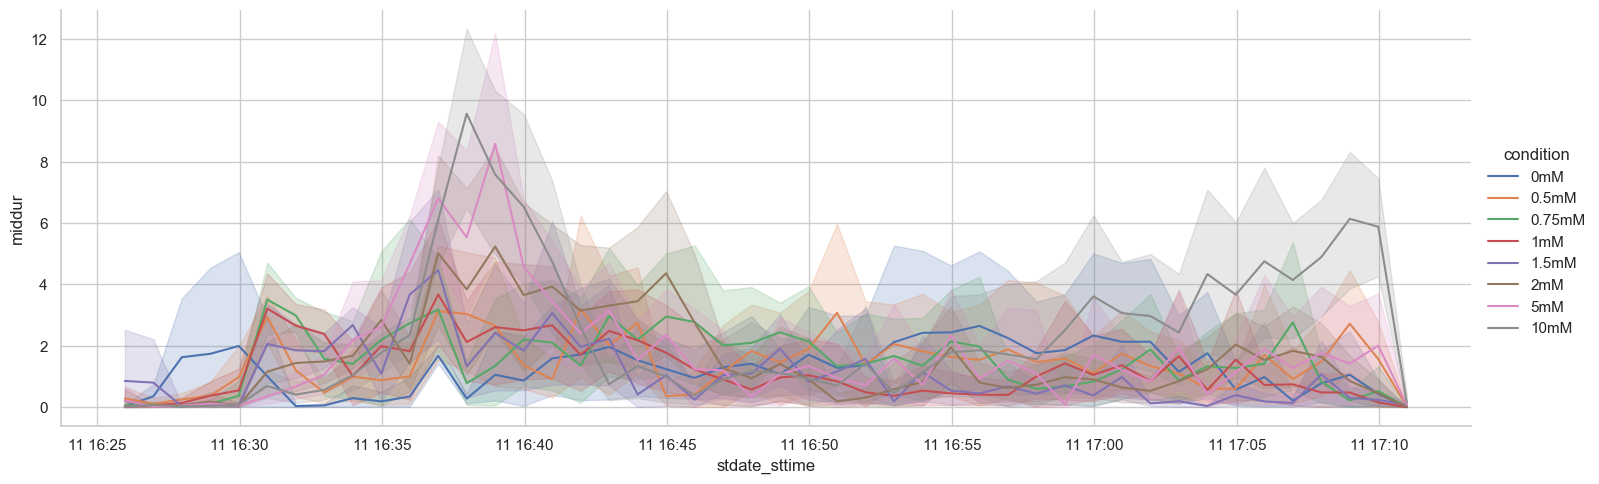

In [173]:
#Middur output NOT FOR Sleep Analysis
# Define input variables
date   = "241107"
box1   = "16"
box2   = "17"
exp    = "PNPO_PTZ"
export = False
    
pnpo_ptz_obj = b6.MiddurData(date, box1, box2, exp, export) #.prepped_data attribute to access df
pnpo_ptz_obj.quick_plot_per_fish()

df = pnpo_ptz_obj.prepped_data

sns.relplot(x="stdate_sttime", y="middur",data=df, kind="line", hue='condition', aspect=3)


In [237]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

def plot_timeseries(grouped_df_filtered):
    ungrouped = grouped_df_filtered.reset_index()

    # Plot using seaborn
    plt.figure(figsize=(14, 6))
    sns.lineplot(
        data=ungrouped,
        x='stdate_sttime',  # x-axis: timestamps
        y='mean',           # y-axis: the mean of 'middur'
        hue='genotype',     # Different lines for each genotype
        hue_order = ['wt','het','hom'],
        linewidth=1,
        palette=new_colors_order
    )
    
    
    # Customize the x-axis format
    ax = plt.gca()  # Get the current axes
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically locate date ticks
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format as 'Date on one line, Time on the next'
    
    # Customize plot
    plt.title("ALDH7A1: Average Activity Over Time per Genotype (Filtered)")
    plt.xlabel("Timestamp")
    plt.ylabel("Mean Activity (s/min)")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend(title="Genotype")
    plt.grid(True)
    
    # Show the plot
    plt.tight_layout()
    plt.show()
    
    
    ### Smooth plot
    
    # Apply a rolling average for smoothing
    ungrouped['smoothed_mean'] = ungrouped.groupby('genotype')['mean'].apply(
        lambda x: x.rolling(window=40, min_periods=1).mean()
    )
    
    # Calculate Standard Error (SE)
    ungrouped['se'] = ungrouped['std'] / np.sqrt(ungrouped['count'])
    
    # Plot using seaborn
    plt.figure(figsize=(14, 6))
    sns.lineplot(
        data=ungrouped,
        x='stdate_sttime',  # x-axis: timestamps
        y='smoothed_mean',           # y-axis: the mean of 'middur'
        hue_order=['wt','het','hom'],
        hue='genotype',     # Different lines for each genotype
        linewidth=1,
        ci=None,
        palette=new_colors_order
    )
    
    
    # Add shaded standard error for each genotype
    for genotype, group in ungrouped.groupby('genotype'):
        # print(genotype, group)
        plt.fill_between(
            group['stdate_sttime'],
            group['smoothed_mean'] - group['se'],  # Lower bound (mean - SE)
            group['smoothed_mean'] + group['se'],  # Upper bound (mean + SE)
            color = color_map[genotype],
            alpha=0.2,                             # Transparency for the shading
            label=f"{genotype} SE"          # Label for the spread
        )
    
    # Customize the x-axis format
    ax = plt.gca()  # Get the current axes
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically locate date ticks
    # ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format as 'Date on one line, Time on the next'
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d\n%H:%M'))  # Format as 'Date on one line, Time on the next'

    
    # Customize plot
    plt.title("Smoothed Average Activity Over Time with Standard Error")
    plt.xlabel("Timestamp")
    plt.ylabel("Smoothed Average Activity (s/min)")
    plt.xticks(rotation=45)
    # plt.legend(title="Genotype and SE Spread")
    
    
    
    plt.grid(True)
    
    # Show the plot
    plt.tight_layout()
    plt.show()